In [2]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features, read_duration,checkForExist,read_did_pred,ScoresAveraging,DoneFeatureMan
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
from preamble import *
Cat = [20, 21, 26, 333, 334, 335,40668, 4135, 4534, 469, 46, 50]

amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1120,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']


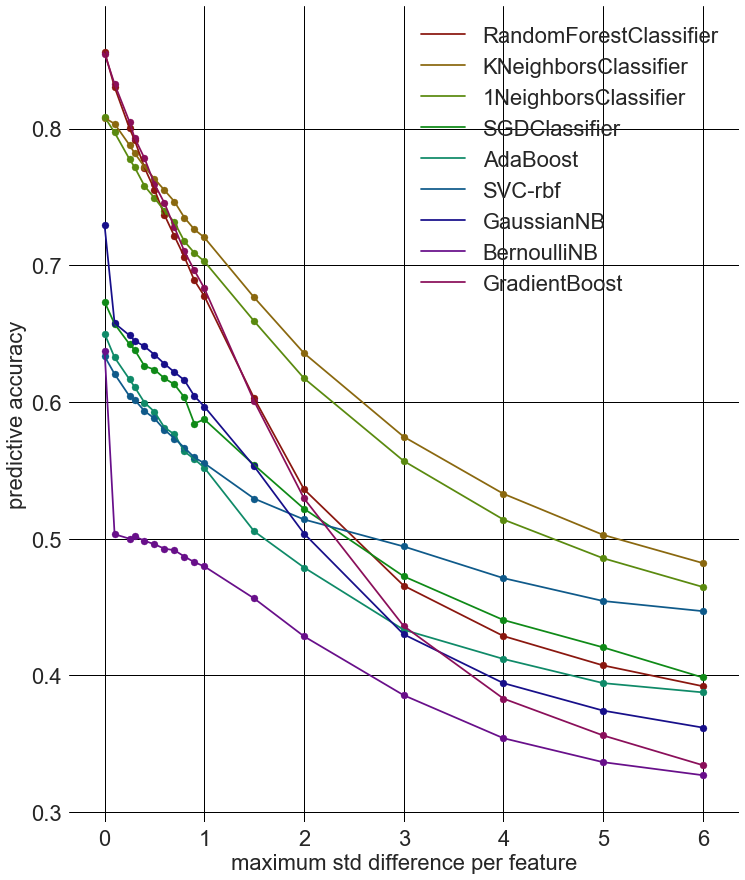

In [2]:
# Feature noise in numerical datasets
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
fig, ax = plt.subplots()
# _=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(15)
fig.set_figwidth(12)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

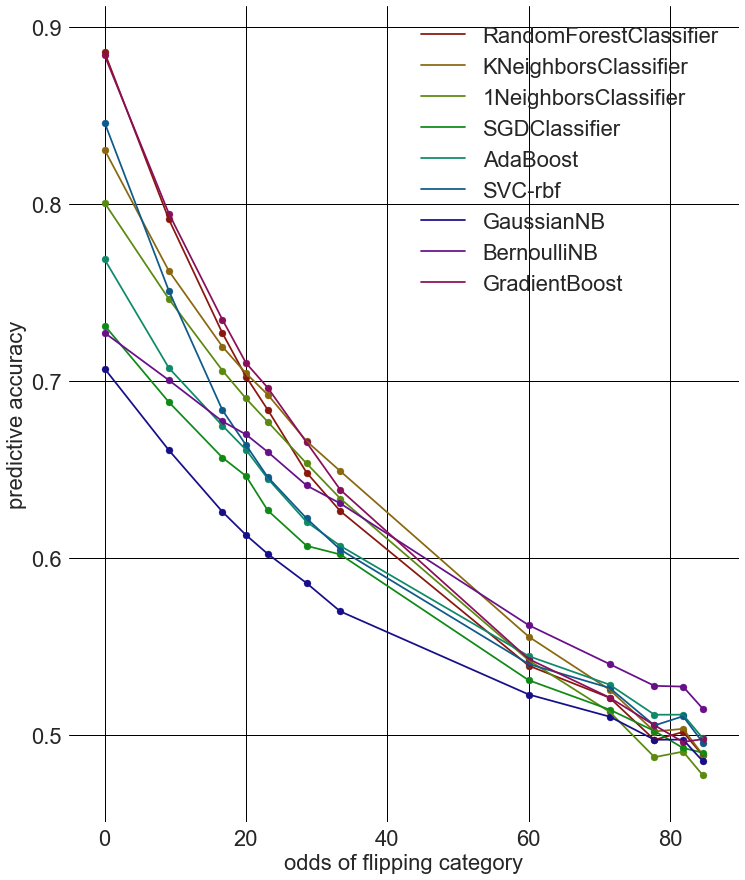

In [3]:
# feature noise in categorical datasets
func = 'cvfeatureCAT2'
scores = []
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
didList = [3,20, 21, 26, 333, 334, 335, 40668, 4135, 4534, 469, 46, 50]
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
flipped = []
for i in amountList:
    if i > 0.5:
        flipped.append((1-1/(i+0.5))*100)
    else:
        flipped.append(0)
x_axis = flipped
fig, ax = plt.subplots()
# _=plt.title(' performance to flipping categories, categorical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('odds of flipping category')
fig.set_figheight(15)
fig.set_figwidth(12)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()


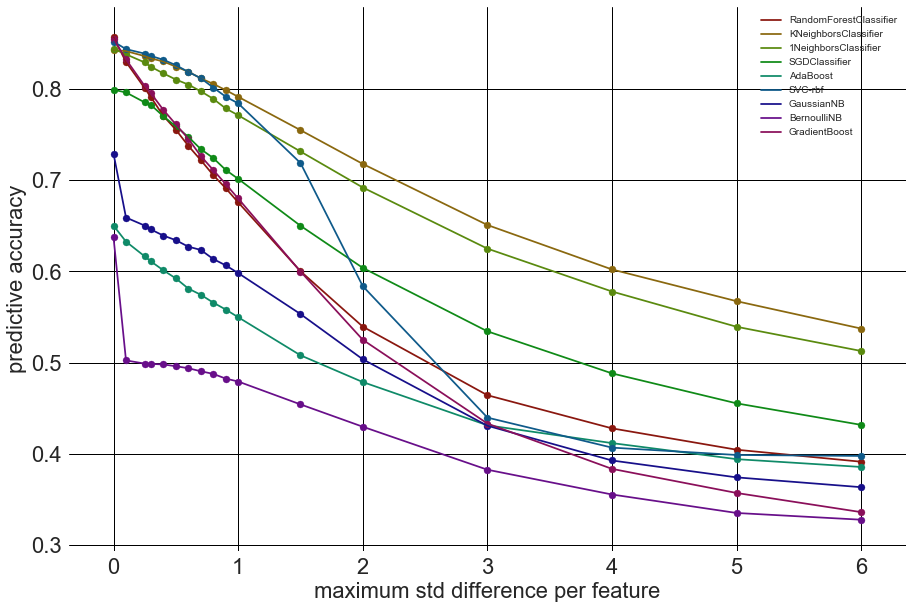

In [28]:
# preprocessed Numerical features
func = 'cvNoisePreProcess'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
fig, ax = plt.subplots()
# _=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show()

In [ ]:
# absolute addition of values 
func = 'cvScoreNoise3'
name = 'scores'
didList = [10,12,18]
amountList = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf']
scores = []

for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,amount,did):
                print(func,clfName,amount,did)
            score1.append(read_did_pred(func,clfName,amount,did,name))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (sum(scores[k][j][i][0]))/10/len(didList)
            score2[j][i] = score2[j][i] + (sum(scores[k][j][i][1]))/10/len(didList)

x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' performance to adding flat values to each features ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('flat amount added')
fig.set_figheight(10)
fig.set_figwidth(10)
# ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
# _=plt.xticks(x_axis,x_axis ,rotation='vertical')
# for i,amount in enumerate(amountList):
#     _=plt.axvline(x=amount,color= 'black')
# #     _=plt.axhline(y=score2[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show()

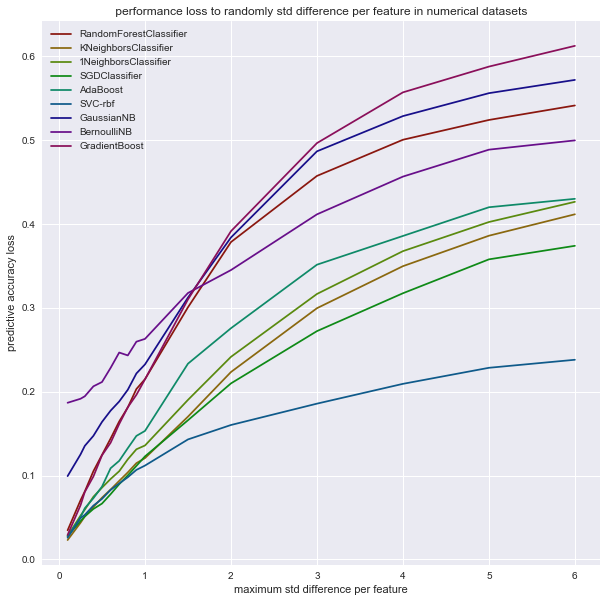

In [2]:
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][i] = score2[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/len(didList)
            if scores[k][j][i][0] == 0:
                score3[j][i] = score3[j][i]
            else:
                score3[j][i] = score3[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/scores[k][j][i][0]/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' performance loss to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i])
#     _=ax.plot(x_axis[1:],score2[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy loss')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()

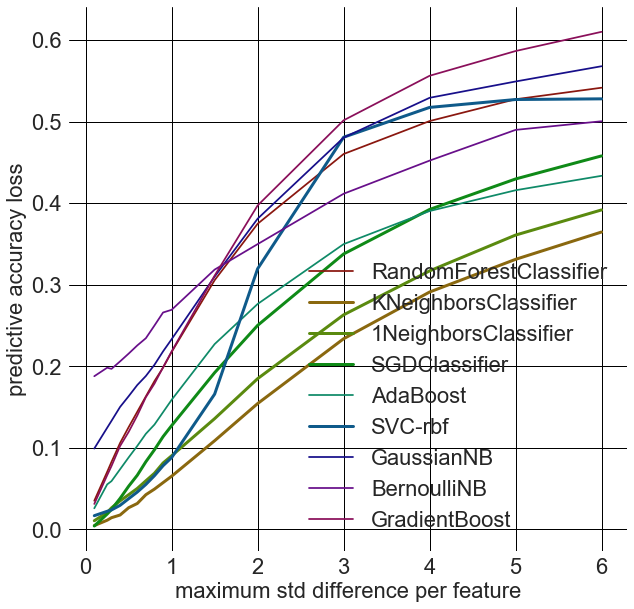

In [9]:
func = 'cvNoisePreProcess'
pres = [1,2,3,5]
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][i] = score2[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/len(didList)
            if scores[k][j][i][0] == 0:
                score3[j][i] = score3[j][i]
            else:
                score3[j][i] = score3[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/scores[k][j][i][0]/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
# _=plt.title(' performance loss to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    if i in pres:
        _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i],linewidth=3)
    else:
        _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i])
#     _=ax.plot(x_axis[1:],score2[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy loss')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

cvScoreFeatures4 RandomForestClassifier 0.25 1120
cvScoreFeatures4 RandomForestClassifier 0.5 1120
cvScoreFeatures4 RandomForestClassifier 1.0 1120
cvScoreFeatures4 KNeighborsClassifier 0.25 1120
cvScoreFeatures4 KNeighborsClassifier 0.5 1120
cvScoreFeatures4 KNeighborsClassifier 1.0 1120
cvScoreFeatures4 SGDClassifier 0.25 1120
cvScoreFeatures4 SGDClassifier 0.5 1120
cvScoreFeatures4 SGDClassifier 1.0 1120
cvScoreFeatures4 SVC-rbf 0.25 1120
cvScoreFeatures4 SVC-rbf 0.5 1120
cvScoreFeatures4 SVC-rbf 1.0 1120
cvScoreFeatures4 GaussianNB 0.25 1120
cvScoreFeatures4 GaussianNB 0.5 1120
cvScoreFeatures4 GaussianNB 1.0 1120
cvScoreFeatures4 BernoulliNB 0.5 1120
cvScoreFeatures4 BernoulliNB 1.0 1120
cvScoreFeatures4 GradientBoost 0.25 1120
cvScoreFeatures4 GradientBoost 0.5 1120
cvScoreFeatures4 GradientBoost 1.0 1120


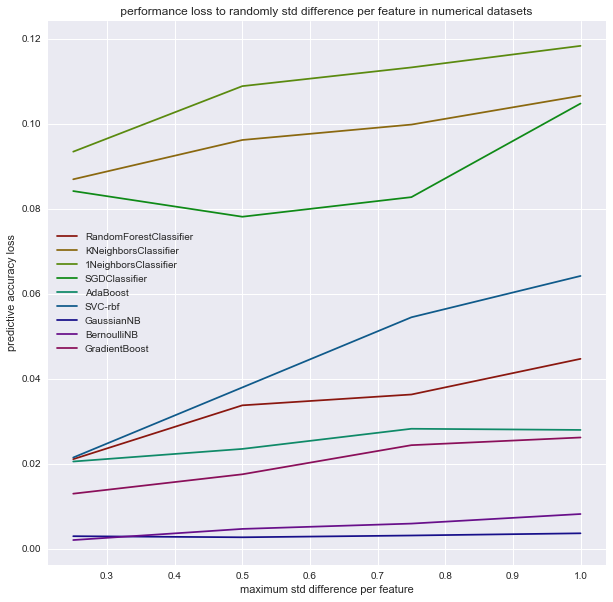

In [6]:
func = 'cvScoreFeatures4'
scores = []
amountList = [0.25,0.5,0.75,1.0]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][i] = score2[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/len(didList)
            if scores[k][j][i][0] == 0:
                score3[j][i] = score3[j][i]
            else:
                score3[j][i] = score3[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/scores[k][j][i][0]/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' performance loss to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i])
#     _=ax.plot(x_axis[1:],score2[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy loss')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()

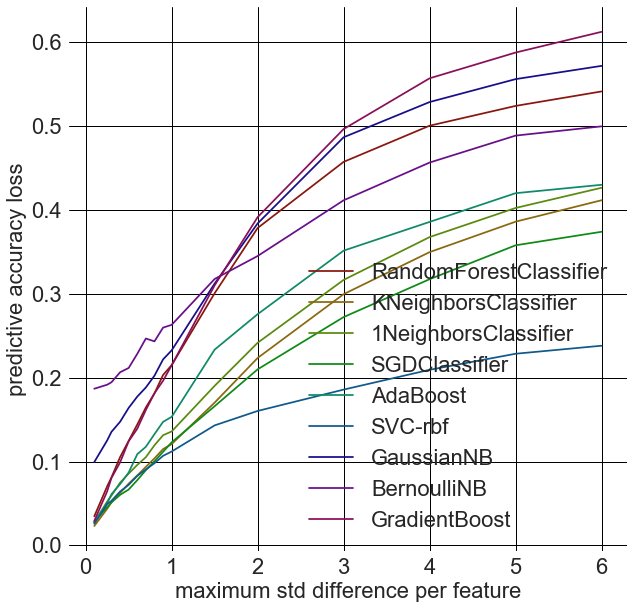

In [27]:
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][i] = score2[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/len(didList)
            if scores[k][j][i][0] == 0:
                score3[j][i] = score3[j][i]
            else:
                score3[j][i] = score3[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/scores[k][j][i][0]/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
# _=plt.title(' performance loss to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i])
#     _=ax.plot(x_axis[1:],score2[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy loss')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

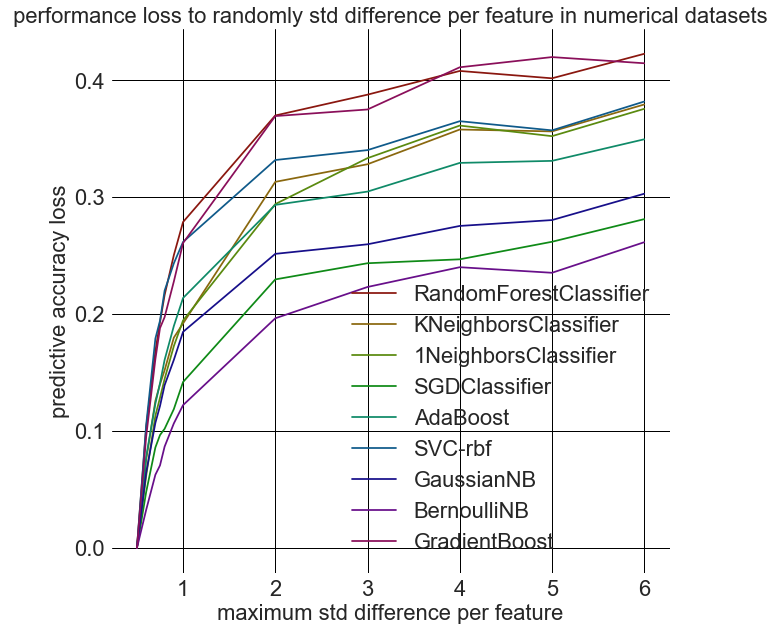

In [7]:
func = 'cvFeatureCAT2'
scores = []
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
didList = Cat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][i] = score2[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/len(didList)
            if scores[k][j][i][0] == 0:
                score3[j][i] = score3[j][i]
            else:
                score3[j][i] = score3[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/scores[k][j][i][0]/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' performance loss to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i])
#     _=ax.plot(x_axis[1:],score2[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy loss')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()
print('categorical needs to change to flipping categories percentage')

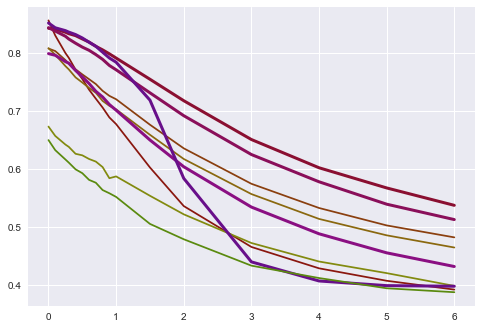

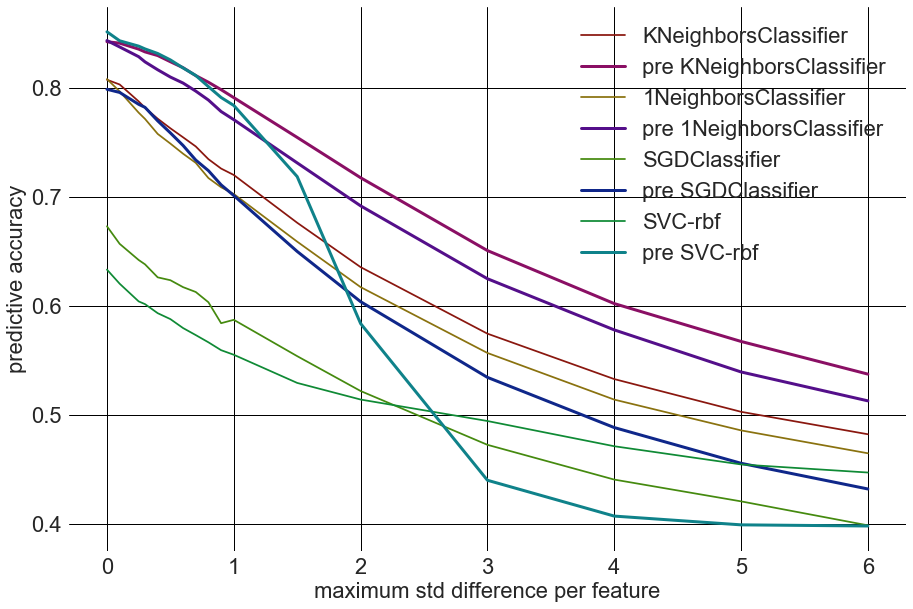

In [25]:
# Feature noise in numerical datasets
clfNames = [ 'KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'SVC-rbf']

func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)

func = 'cvNoisePreProcess'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score5 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score5.append(read_features(func,clfName,did,amount))
        scores[i].append(score5)
count = []
for amount in amountList:
    count.append(str(amount))
score3= []
score4 = []
ratio = []
for i in clfNames:
    score3.append([0 for i in range(len(amountList))])
    score4.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score3[j][i] = score3[j][i] + (scores[k][j][i][0])/len(didList)
            score4[j][0] = score4[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score4[j][i+1] = score4[j][i+1] + (scores[k][j][i][1])/len(didList)            


amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
fig, ax = plt.subplots()
# _=plt.title(' performance to randomly std difference per feature in numerical datasets ')
aL = int(len(score1)*2)
cl = sns.hls_palette(aL, l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
#     _=ax.scatter(x_axis, score2[i], color = cl[i])
    _=ax.plot(x_axis, score4[i],label= 'pre ' + clfNames[i], color = cl[aL-i-1],linewidth = 3)
#     _=ax.scatter(x_axis, score4[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

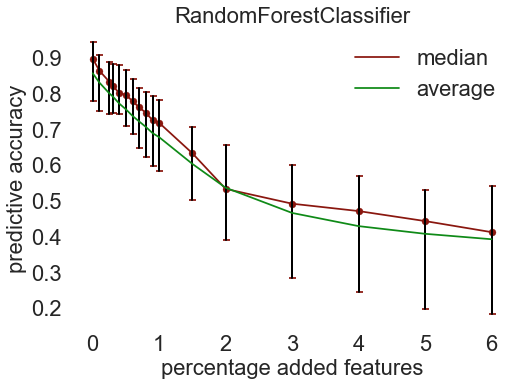

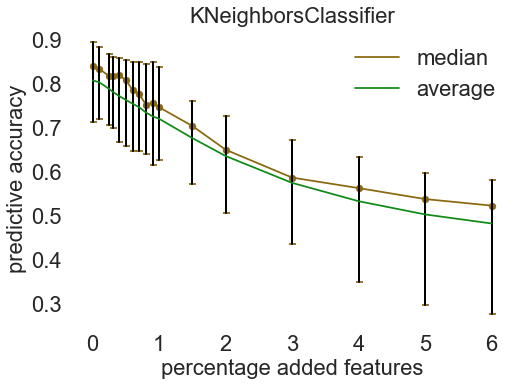

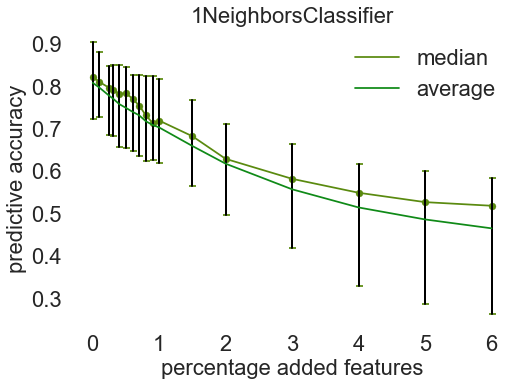

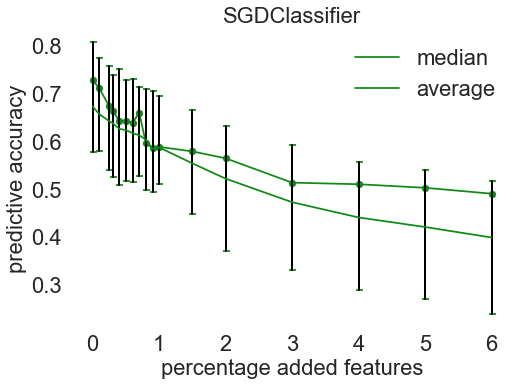

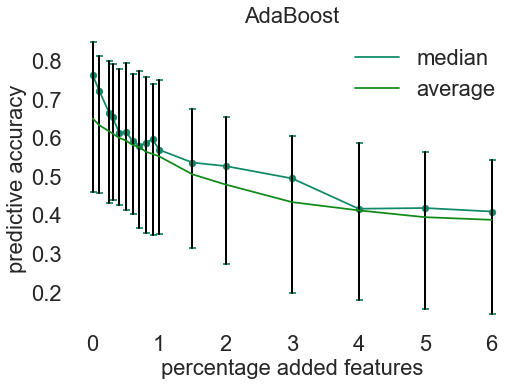

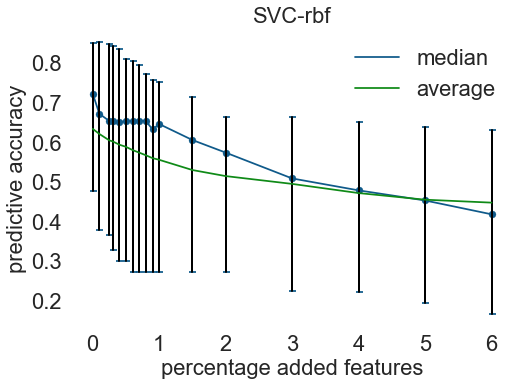

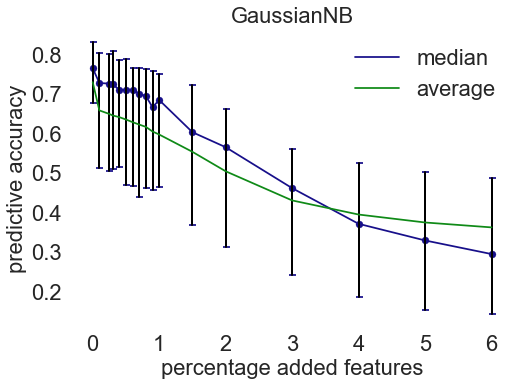

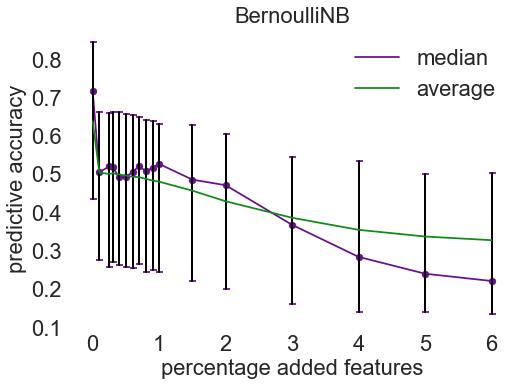

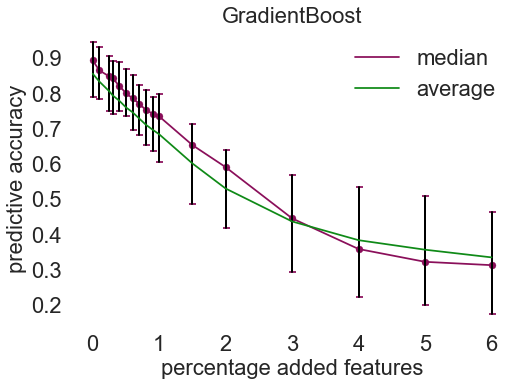

In [7]:
# Feature noise in numerical datasets
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([[] for i in range(len(amountList))])
    score2.append([[] for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i].append(scores[k][j][i][0])
            score2[j][0].append(scores[k][j][i][0])
            score2[j][i+1].append(scores[k][j][i][1])
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2

cl = sns.hls_palette(len(score2), l=.3, s=.8)
for k,clfName in enumerate(clfNames):
    lines = CIIntervals(score2[k])
    fig, ax = plt.subplots()    
    _=ax.plot(x_axis, lines[1], color = cl[k],label = 'median')
    _=ax.scatter(x_axis, lines[1], color = cl[k])
    _=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
    _=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
    for i,item in enumerate(x_axis):
        ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2)
    _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
    _=plt.ylabel('predictive accuracy')
    _=plt.xlabel('percentage added features')
    plt.title(clfName)
    ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)    
    plt.show()


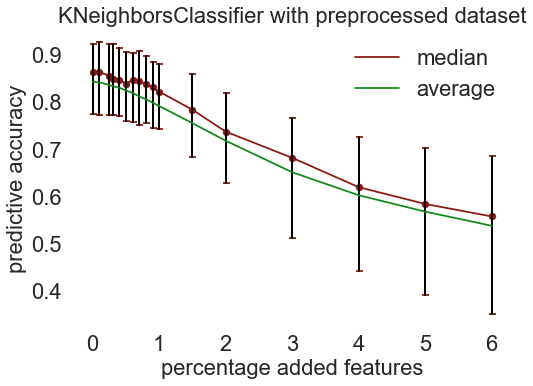

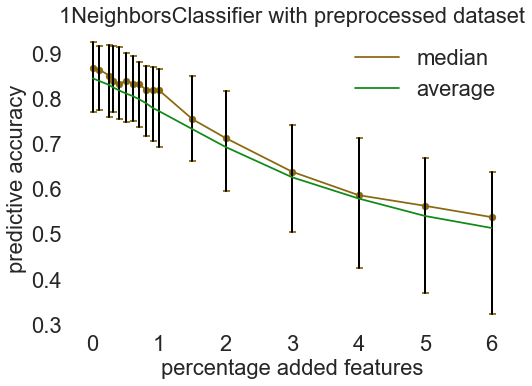

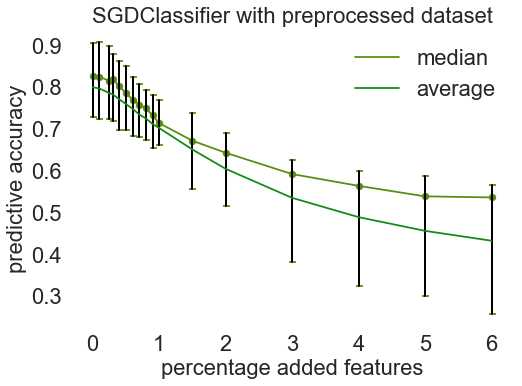

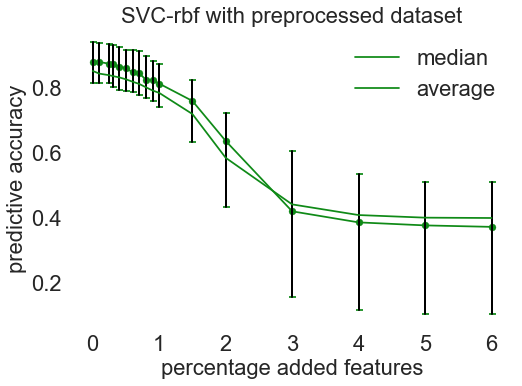

In [9]:
from Noise2 import CIIntervals
clfNames = [ 'KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'SVC-rbf']
func = 'cvNoisePreProcess'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score5 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score5.append(read_features(func,clfName,did,amount))
        scores[i].append(score5)
count = []
for amount in amountList:
    count.append(str(amount))
score3= []
score4 = []
ratio = []
for i in clfNames:
    score3.append([[] for i in range(len(amountList))])
    score4.append([[] for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score3[j][i].append(scores[k][j][i][0])
            score4[j][0].append(scores[k][j][i][0])
            score4[j][i+1].append(scores[k][j][i][1])
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
            
cl = sns.hls_palette(len(score2), l=.3, s=.8)
for k,clfName in enumerate(clfNames):
    lines = CIIntervals(score4[k])
    fig, ax = plt.subplots()    
    _=ax.plot(x_axis, lines[1], color = cl[k],label = 'median')
    _=ax.scatter(x_axis, lines[1], color = cl[k])
    _=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
    _=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
    for i,item in enumerate(x_axis):
        ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2)
    _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
    _=plt.ylabel('predictive accuracy')
    _=plt.xlabel('percentage added features')
    plt.title(clfName + ' with preprocessed dataset')
    ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)    
    plt.show()

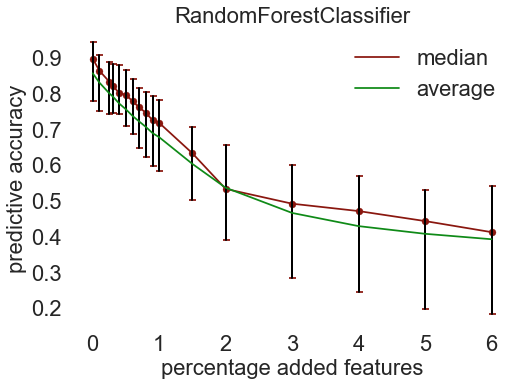

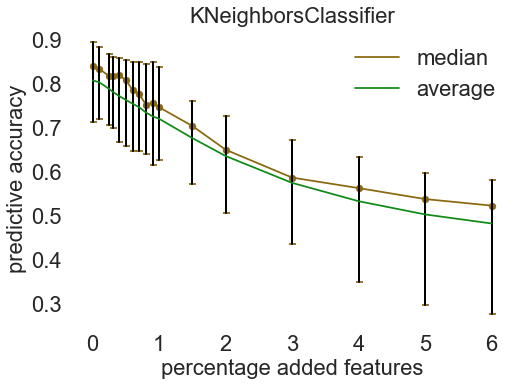

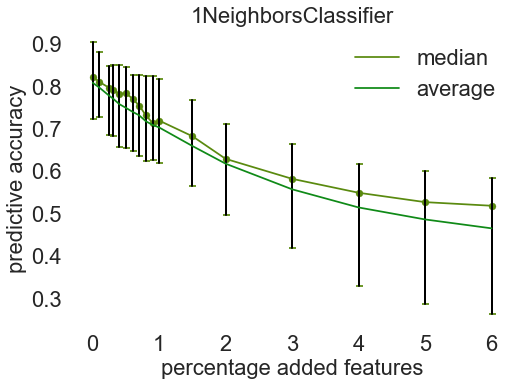

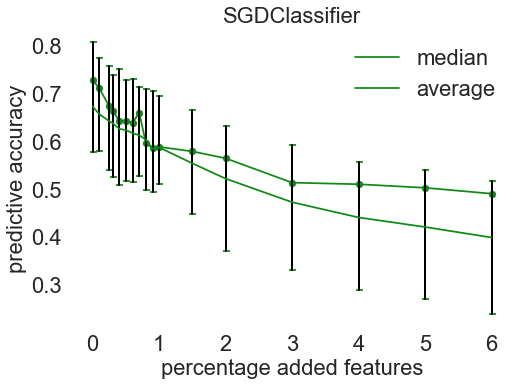

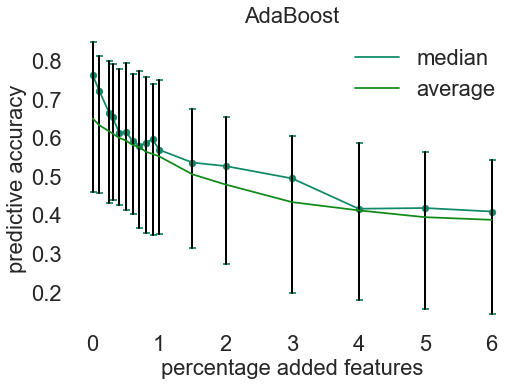

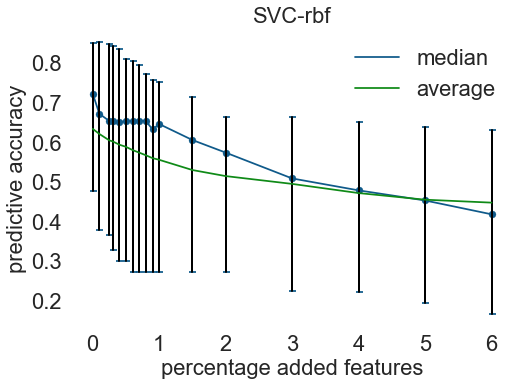

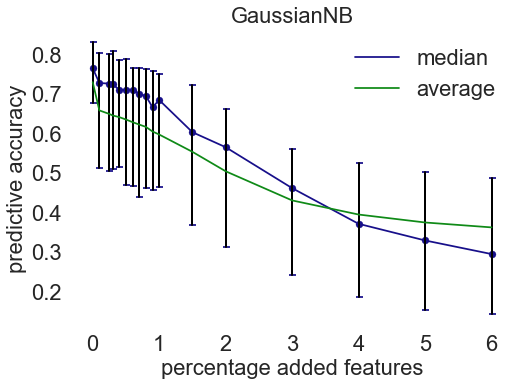

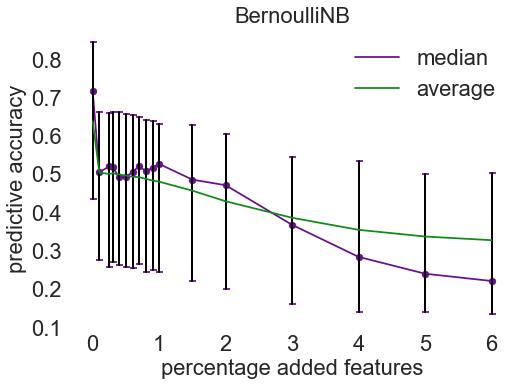

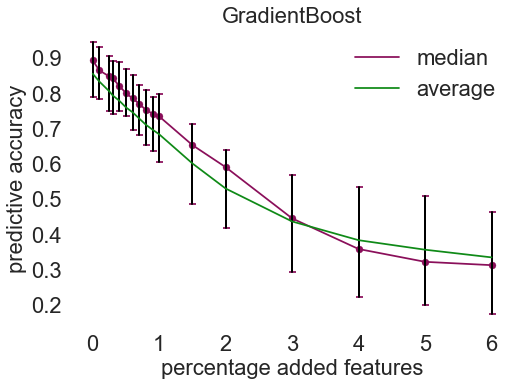

In [2]:
# Feature noise in numerical datasets
from Noise2 import CIIntervals
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([[] for i in range(len(amountList))])
    score2.append([[] for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i].append(scores[k][j][i][0])
            score2[j][0].append(scores[k][j][i][0])
            score2[j][i+1].append(scores[k][j][i][1])
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2

cl = sns.hls_palette(len(score2), l=.3, s=.8)
for k,clfName in enumerate(clfNames):
    lines = CIIntervals(score2[k])
    fig, ax = plt.subplots()    
    _=ax.plot(x_axis, lines[1], color = cl[k],label = 'median')
    _=ax.scatter(x_axis, lines[1], color = cl[k])
    _=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
    _=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
    for i,item in enumerate(x_axis):
        ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2)
    _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
    _=plt.ylabel('predictive accuracy')
    _=plt.xlabel('percentage added features')
    plt.title(clfName)
    ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)    
    plt.show()

In [ ]:
lines = CIIntervals(score2[k])
fig, ax = plt.subplots()    
_=ax.plot(x_axis, lines[1], color = cl[k],label = 'median')
_=ax.scatter(x_axis, lines[1], color = cl[k])
_=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
_=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
for i,item in enumerate(x_axis):
    ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2)
    

_=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
plt.title(clfName)
ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)    
plt.show()

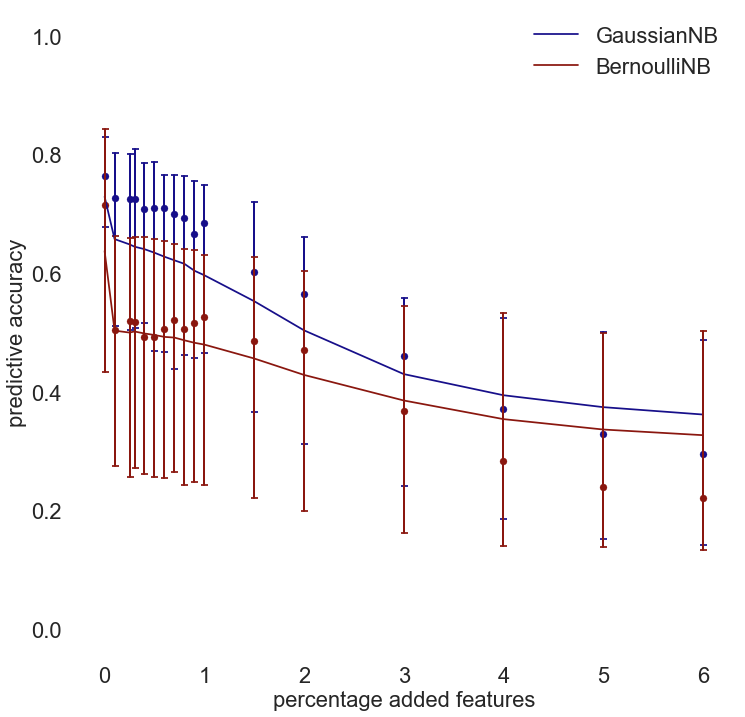

In [3]:
k = 6
lines = CIIntervals(score2[k])
fig, ax = plt.subplots()    
# _=ax.plot(x_axis, lines[1], color = cl[k],label = clfNames[k])
_=ax.plot(x_axis, lines[3], color = cl[k],label = clfNames[k])
_=ax.scatter(x_axis, lines[1], color = cl[k])
_=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
_=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
# _=ax.scatter([0,1], [1,0], color = 'white', marker = "_")
for i,item in enumerate(x_axis):
    ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2, color = cl[k])
k = 7
clfName = clfNames[0]
b = 0
lines = CIIntervals(score2[k])   
# _=ax.plot(x_axis, lines[1], color = cl[b],label = clfNames[k])
_=ax.plot(x_axis, lines[3], color = cl[b],label = clfNames[k])
_=ax.scatter(x_axis, lines[1], color = cl[b])
_=ax.scatter(x_axis, lines[0], color = cl[b], marker = "_")
_=ax.scatter(x_axis, lines[2], color = cl[b], marker = "_")
_=ax.scatter([0,1], [1,0], color = 'white', marker = "_")
for i,item in enumerate(x_axis):
    ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2, color = cl[b])
    

    
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(12)
fig.set_figwidth(12)
ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)    
plt.show()

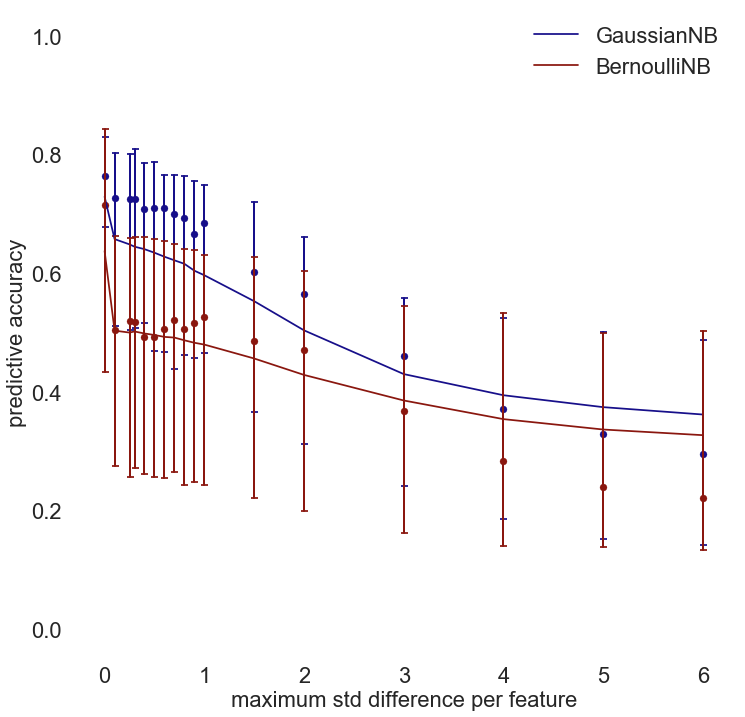

In [7]:
k = 6
lines = CIIntervals(score2[k])
fig, ax = plt.subplots()    
# _=ax.plot(x_axis, lines[1], color = cl[k],label = clfNames[k])
_=ax.plot(x_axis, lines[3], color = cl[k],label = clfNames[k])
_=ax.scatter(x_axis, lines[1], color = cl[k])
_=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
_=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
# _=ax.scatter([0,1], [1,0], color = 'white', marker = "_")
for i,item in enumerate(x_axis):
    ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2, color = cl[k])
k = 7
clfName = clfNames[0]
b = 0
lines = CIIntervals(score2[k])   
# _=ax.plot(x_axis, lines[1], color = cl[b],label = clfNames[k])
_=ax.plot(x_axis, lines[3], color = cl[b],label = clfNames[k])
_=ax.scatter(x_axis, lines[1], color = cl[b])
_=ax.scatter(x_axis, lines[0], color = cl[b], marker = "_")
_=ax.scatter(x_axis, lines[2], color = cl[b], marker = "_")
_=ax.scatter([0,1], [1,0], color = 'white', marker = "_")
for i,item in enumerate(x_axis):
    ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2, color = cl[b])
    

    
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(12)
fig.set_figwidth(12)
ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)    
plt.show()

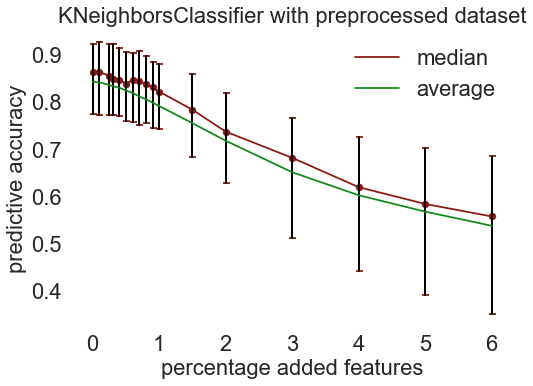

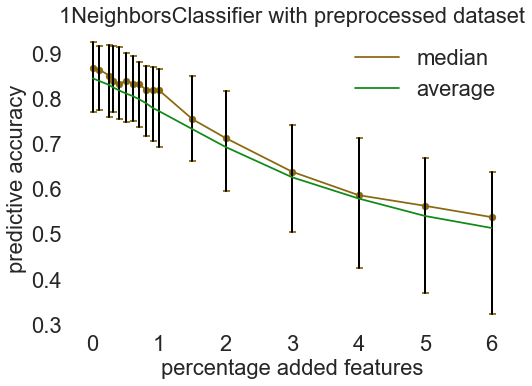

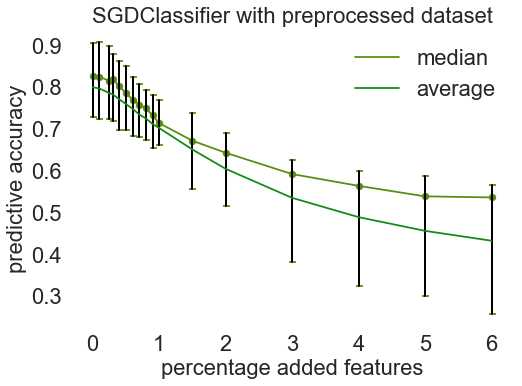

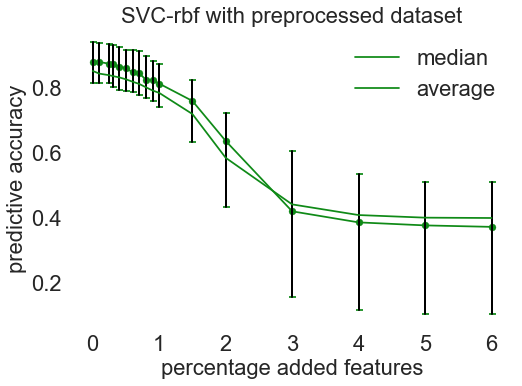

In [8]:
from Noise2 import CIIntervals
clfNames = [ 'KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'SVC-rbf']
func = 'cvNoisePreProcess'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score5 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score5.append(read_features(func,clfName,did,amount))
        scores[i].append(score5)
count = []
for amount in amountList:
    count.append(str(amount))
score3= []
score4 = []
ratio = []
for i in clfNames:
    score3.append([[] for i in range(len(amountList))])
    score4.append([[] for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score3[j][i].append(scores[k][j][i][0])
            score4[j][0].append(scores[k][j][i][0])
            score4[j][i+1].append(scores[k][j][i][1])
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
            
cl = sns.hls_palette(len(score2), l=.3, s=.8)
for k,clfName in enumerate(clfNames):
    lines = CIIntervals(score4[k])
    fig, ax = plt.subplots()    
    _=ax.plot(x_axis, lines[1], color = cl[k],label = 'median')
    _=ax.scatter(x_axis, lines[1], color = cl[k])
    _=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
    _=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
    for i,item in enumerate(x_axis):
        ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2)
    _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
    _=plt.ylabel('predictive accuracy')
    _=plt.xlabel('percentage added features')
    plt.title(clfName + ' with preprocessed dataset')
    ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)    
    plt.show()

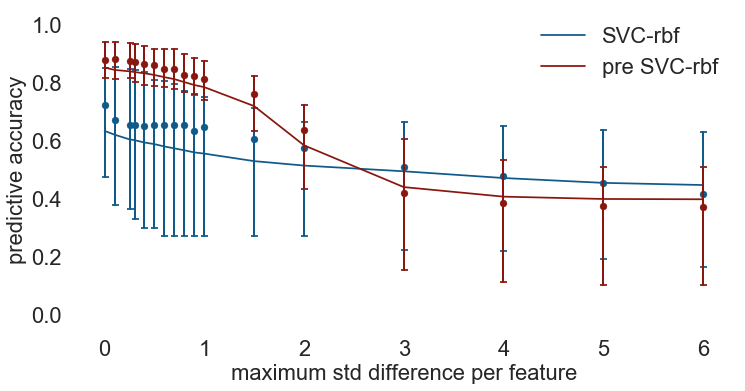

In [9]:
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']

k = 5
preK = copy(k)
lines = CIIntervals(score2[k])
fig, ax = plt.subplots()    
# _=ax.plot(x_axis, lines[1], color = cl[k],label = clfNames[k])
_=ax.plot(x_axis, lines[3], color = cl[k],label = clfNames[k])
_=ax.scatter(x_axis, lines[1], color = cl[k])
_=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
_=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
# _=ax.scatter([0,1], [1,0], color = 'white', marker = "_")
for i,item in enumerate(x_axis):
    ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2, color = cl[k])
k = 3
clfName = clfNames[0]
b = 0
lines = CIIntervals(score4[k])   
# _=ax.plot(x_axis, lines[1], color = cl[b],label = clfNames[k])
_=ax.plot(x_axis, lines[3], color = cl[b],label = 'pre ' + clfNames[preK])
_=ax.scatter(x_axis, lines[1], color = cl[b])
_=ax.scatter(x_axis, lines[0], color = cl[b], marker = "_")
_=ax.scatter(x_axis, lines[2], color = cl[b], marker = "_")
# _=ax.scatter([0,1], [1,0], color = 'white', marker = "_")
for i,item in enumerate(x_axis):
    ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2, color = cl[b])
    
_=ax.scatter([0,1], [1,0], color = 'white')
    
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(6)
fig.set_figwidth(12)
ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)    
plt.show()

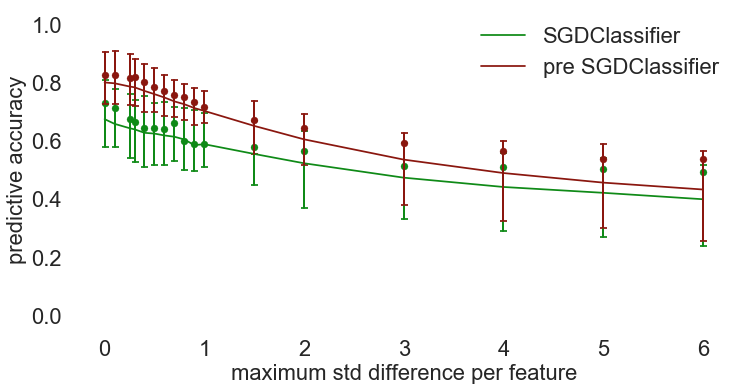

In [12]:
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']

k = 3
preK = copy(k)
lines = CIIntervals(score2[k])
fig, ax = plt.subplots()    
# _=ax.plot(x_axis, lines[1], color = cl[k],label = clfNames[k])
_=ax.plot(x_axis, lines[3], color = cl[k],label = clfNames[k])
_=ax.scatter(x_axis, lines[1], color = cl[k])
_=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
_=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
# _=ax.scatter([0,1], [1,0], color = 'white', marker = "_")
for i,item in enumerate(x_axis):
    ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2, color = cl[k])
k = 2
clfName = clfNames[0]
b = 0
lines = CIIntervals(score4[k])   
# _=ax.plot(x_axis, lines[1], color = cl[b],label = clfNames[k])
_=ax.plot(x_axis, lines[3], color = cl[b],label = 'pre ' + clfNames[preK])
_=ax.scatter(x_axis, lines[1], color = cl[b])
_=ax.scatter(x_axis, lines[0], color = cl[b], marker = "_")
_=ax.scatter(x_axis, lines[2], color = cl[b], marker = "_")
_=ax.scatter([0,1], [1,0], color = 'white')
# _=ax.scatter([0,1], [1,0], color = 'white', marker = "_")
for i,item in enumerate(x_axis):
    ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2, color = cl[b])
    

    
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(6)
fig.set_figwidth(12)
ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)    
plt.show()

In [18]:
for k in [0,1,2,3]:
    lines = CIIntervals(score4[k])  
    min1 = 0
    max1 = len(score4[k])-1
    print((lines[3][min1]-lines[3][max1])/max(x_axis))

0.05089044359892427
0.055168300488425116
0.061196815596518746
0.07566571600170917


In [20]:
for k in [1,2,3,5]:
    lines = CIIntervals(score2[k])  
    min1 = 0
    max1 = len(score2[k])-1
    print((lines[3][min1]-lines[3][max1])/max(x_axis))

0.05428084134791345
0.057297914713319444
0.04579175893929801
0.03106907112363949


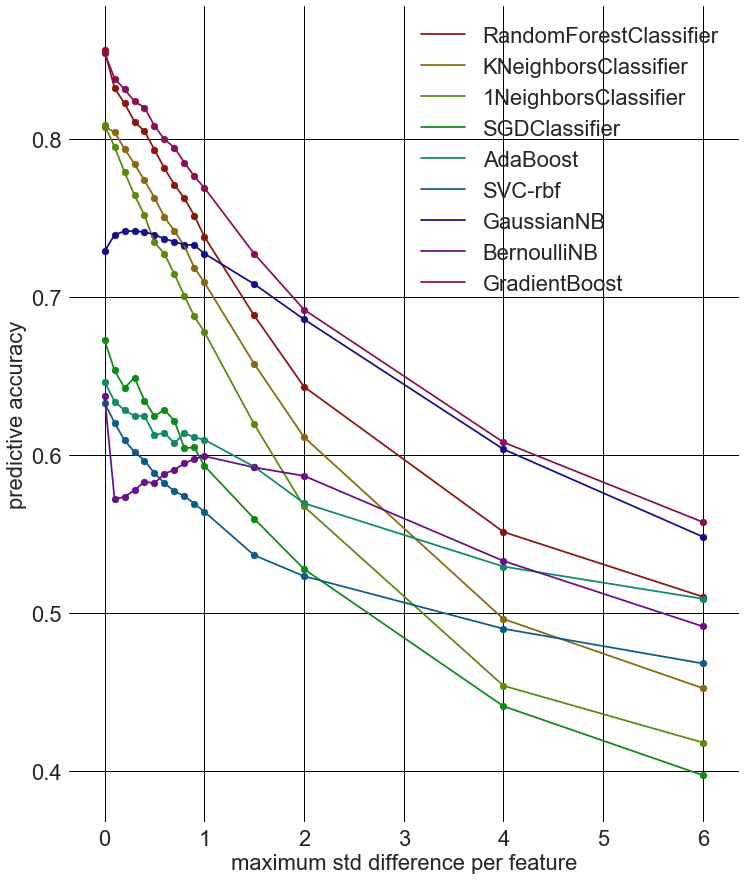

In [3]:
# Feature noise in numerical datasets
func = 'ResNoiseNum'
func2 = 'cvFeatureSTD1'
scores = []
scores2 = []
amountList = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,6]
amountList2 = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
didList.remove(1120)
div = 0
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
            if amount in amountList2:
                div = div +1
                if not checkForExist(func2,clfName,did,amount):
                    print(func2,clfName,amount,did)
                score2.append(read_features(func2,clfName,did,amount))
        scores[i].append(score1)
        scores2[i].append(score2)

score1= []
for i in clfNames:
    score1.append([0 for i in range(len(amountList)+1)])
for k,x in enumerate(scores2):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][0] = score1[j][0] + (scores2[k][j][i][0])
for j,item in enumerate(score1):
    score1[j][0] = score1[j][0]/div*len(clfNames)
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i+1] = score1[j][i+1] + (scores[k][j][i][0])/len(didList)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axisTT = amountList2
fig, ax = plt.subplots()
# _=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis[1:], score1[i], color = cl[i])
#     _=ax.scatter(x_axis[1:], score1[i], color = cl[i])
    _=ax.plot(x_axisTT, score1[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axisTT, score1[i], color = cl[i])
#     _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(15)
fig.set_figwidth(12)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

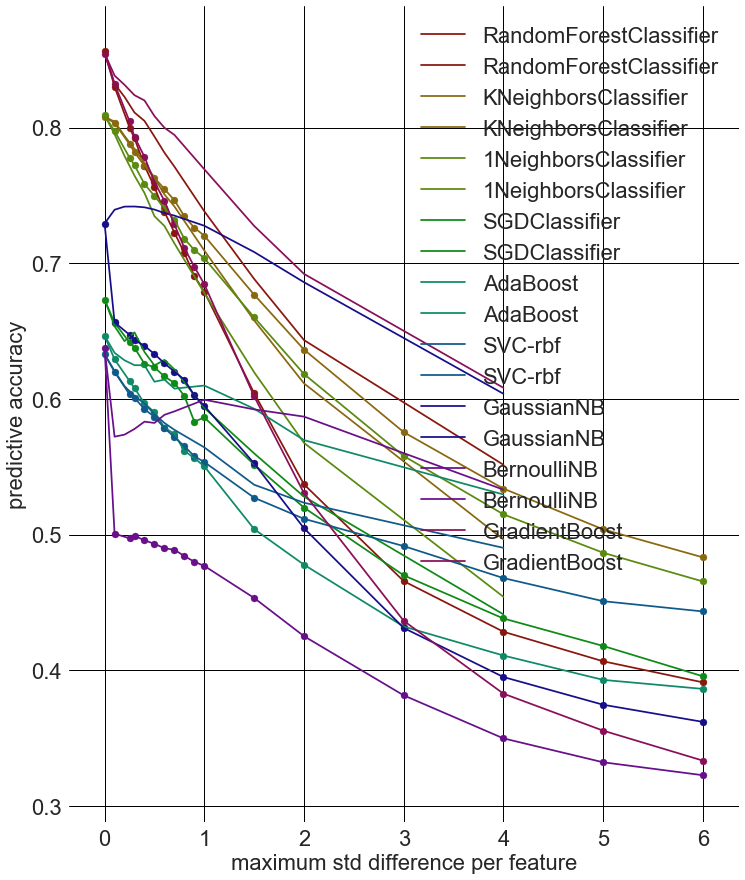

In [30]:
# Feature noise in numerical datasets
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        cupy = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            cupy.append(read_features(func,clfName,did,amount))
        scores[i].append(cupy)
score2 = []
for i in clfNames:
    score2.append([0 for i in range(len(amountList)+1)])
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
fig, ax = plt.subplots()
# _=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    _=ax.plot(x_axisTT, score1[i],label=clfNames[i], color = cl[i], ls = ':')
#     _=ax.scatter(x_axisTT, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(15)
fig.set_figwidth(12)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

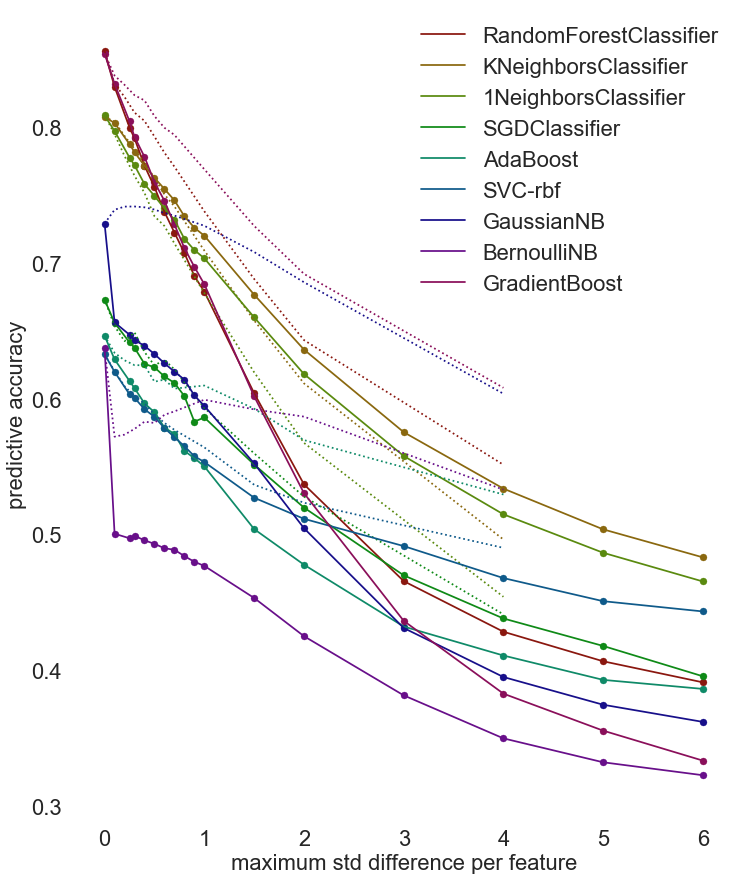

In [33]:
fig, ax = plt.subplots()
# _=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    _=ax.plot(x_axisTT, score1[i], color = cl[i], ls = ':')
#     _=ax.scatter(x_axisTT, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(15)
fig.set_figwidth(12)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
# plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

In [5]:
# Feature noise in numerical datasets
from Noise2 import CIIntervals
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,1,1.5,2,4]
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
# didList.remove(1120)
div = 0
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
            if amount in amountList2:
                div = div +1
                if not checkForExist(func2,clfName,did,amount):
                    print(func2,clfName,amount,did)
                score2.append(read_features(func2,clfName,did,amount))
        scores[i].append(score1)
        scores2[i].append(score2)

score1= []
for i in clfNames:
    score1.append([[] for i in range(len(amountList)+1)])
for k,x in enumerate(scores2):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][0].append((scores2[k][j][i][0]))
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i+1].append((scores[k][j][i][0]))
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2

cl = sns.hls_palette(len(score1), l=.3, s=.8)
for k,clfName in enumerate(clfNames):
    lines = CIIntervals(score1[k])
    fig, ax = plt.subplots()    
    _=ax.plot(x_axis, lines[1], color = cl[k],label = 'median')
    _=ax.scatter(x_axis, lines[1], color = cl[k])
    _=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
    _=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
    for i,item in enumerate(x_axis):
        ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2)
    _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
    _=plt.ylabel('predictive accuracy')
    _=plt.xlabel('percentage added features')
    plt.title(clfName)
    ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)    
    plt.show()

IndexError: list index out of range

In [15]:
len(clfNames)

9

In [18]:
lengths = []
for i,item in enumerate(NonCat):
    lengths.append(readDict(item)['NumberOfInstances'])

In [23]:
count = 0
for i in lengths:
    if i > 5000:
        count = count + 1
print(count)

14


In [2]:
less1000 = []
great5000 = []
rest = []
for i,item in enumerate(NonCat):
    if readDict(item)['NumberOfInstances'] < 1000:
        less1000.append(item)
    elif readDict(item)['NumberOfInstances'] > 5000:
        great5000.append(item)
    else:
        rest.append(item)

In [27]:
len(less1000)

14

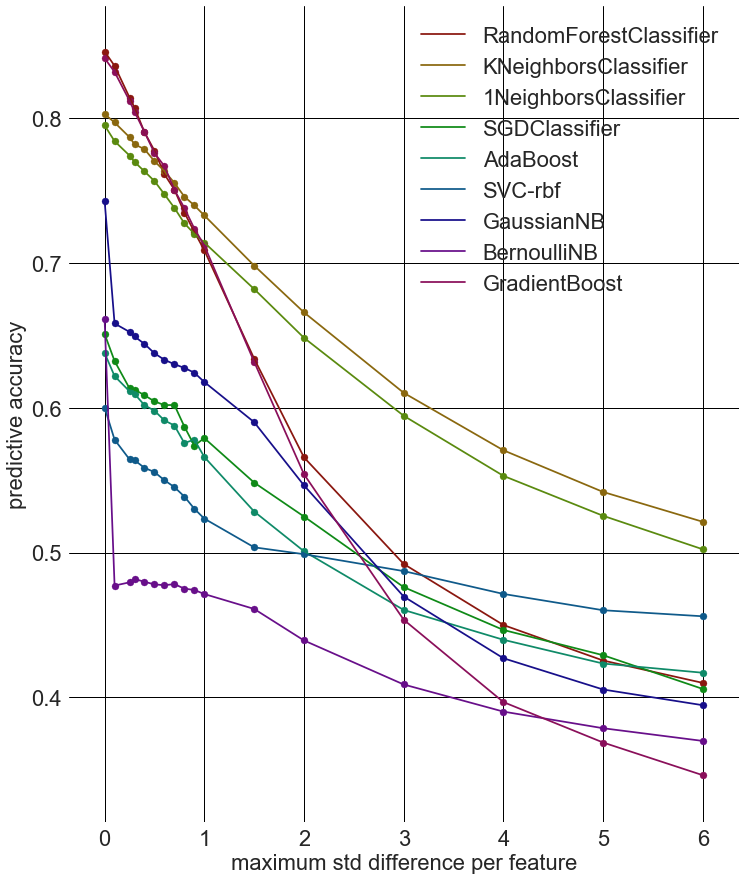

In [31]:
# Feature noise in numerical datasets
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = rest
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
fig, ax = plt.subplots()
# _=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(15)
fig.set_figwidth(12)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

In [3]:
# # Feature noise in numerical datasets
less1000 = []
great5000 = []
rest = []
for i,item in enumerate(NonCat):
    if readDict(item)['NumberOfInstances'] < 1000:
        less1000.append(item)
    elif readDict(item)['NumberOfInstances'] > 5000:
        great5000.append(item)
    else:
        rest.append(item)
from Noise2 import CIIntervals
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(less1000):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
scores2 = []
for i,did in enumerate(rest):
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores2[i].append(score1)
scores3 = []
for i,did in enumerate(great5000):
    scores3.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores3[i].append(score1)

score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([[] for i in range(len(amountList)+1)])
    score2.append([[] for i in range(len(amountList)+1)])
    score3.append([[] for i in range(len(amountList)+1)])
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][0].append(scores[k][j][i][0])
            score1[j][i+1].append(scores[k][j][i][1])
for k,x in enumerate(scores2):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][0].append(scores2[k][j][i][0])
            score2[j][i+1].append(scores2[k][j][i][1])
for k,x in enumerate(scores3):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score3[j][0].append(scores3[k][j][i][0])
            score3[j][i+1].append(scores3[k][j][i][1])
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
cuk = 'xkcd:bright yellow'
clo = 'xkcd:strawberry'
col = 'xkcd:bluish'
# cl = sns.hls_palette(len(score2), l=.3, s=.8)
# for k,clfName in enumerate(clfNames):
#     lines1 = CIIntervals(score1[k])
#     lines2 = CIIntervals(score2[k])
#     lines3 = CIIntervals(score3[k])
#     ax.fill_between(x_axis, lines2[0], lines2[2],alpha=0.3, facecolor=cuk)
#     _=ax.plot(x_axis, lines2[1], c=cuk)
#     _=ax.scatter(x_axis, lines2[1], c=cuk , label = 'medium')
#     ax.fill_between(x_axis, lines1[0], lines1[2],alpha=0.3, facecolor=clo)
#     _=ax.plot(x_axis, lines1[1], c=clo)
#     _=ax.scatter(x_axis, lines1[1], c=clo , label = 'small')
#     ax.fill_between(x_axis, lines3[0], lines3[2],alpha=0.3, facecolor=col)
#     _=ax.plot(x_axis, lines3[1], c=col)
#     _=ax.scatter(x_axis, lines3[1], c=col , label = 'large')
# #     _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
#     _=plt.ylabel('predictive accuracy')
#     _=plt.xlabel('percentage added features')
#     plt.title(clfName)
#     ax.legend( prop={'size': 22})
# #     plt.grid(True,color='black')
#     ax.set_facecolor('xkcd:white')
#     for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
#         item.set_fontsize(22)    
#     plt.show()

In [ ]:
fig, ax = plt.subplots()

with sns.axes_style("darkgrid"):
    for i in range(5):
        ax.plot(means.ix[i][list(range(3,104))], label=means.ix[i]["label"])
        ax.fill_between(means.ix[i][list(range(3,104))]-stds.ix[i][list(range(3,104))], means.ix[i][list(range(3,104))]+stds.ix[i][list(range(3,104))])
    ax.legend()

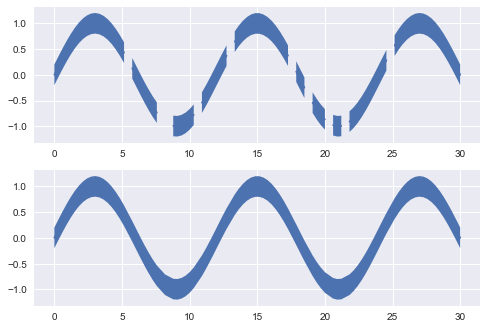

In [41]:
x = np.linspace(0, 30, 100)
y = np.sin(x/6*np.pi)
error = 0.2

means = pd.DataFrame(np.array([x,y]).T,columns=['time','mean'])
stds = pd.DataFrame(np.zeros(y.shape)+error)

#sprinkle some NaN in the mean
sprinkles = means.sample(10).index
means.loc[sprinkles] = np.NaN


fig, axs = plt.subplots(2,1)

axs[0].plot(means.iloc[:,0], means.iloc[:,1])
axs[0].fill_between(means.iloc[:,0], means.iloc[:,1]-stds.iloc[:,0], means.iloc[:,1]+stds.iloc[:,0])

temp_means = means.dropna()

axs[1].plot(temp_means.iloc[:,0], temp_means.iloc[:,1])
axs[1].fill_between(temp_means.iloc[:,0], temp_means.iloc[:,1]-stds.loc[temp_means.index,0], temp_means.iloc[:,1]+stds.loc[temp_means.index,0])


plt.show()

In [2]:
# # Feature noise in numerical datasets
less1000 = []
great5000 = []
rest = []
for i,item in enumerate(NonCat):
    if readDict(item)['NumberOfInstances'] < 1000:
        less1000.append(item)
    elif readDict(item)['NumberOfInstances'] > 5000:
        great5000.append(item)
    else:
        rest.append(item)
from Noise2 import CIIntervals
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(less1000):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
scores2 = []
for i,did in enumerate(rest):
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores2[i].append(score1)
scores3 = []
for i,did in enumerate(great5000):
    scores3.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores3[i].append(score1)

score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([[] for i in range(len(amountList)+1)])
    score2.append([[] for i in range(len(amountList)+1)])
    score3.append([[] for i in range(len(amountList)+1)])
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][0].append(scores[k][j][i][0])
            score1[j][i+1].append(scores[k][j][i][1])
for k,x in enumerate(scores2):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][0].append(scores2[k][j][i][0])
            score2[j][i+1].append(scores2[k][j][i][1])
for k,x in enumerate(scores3):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score3[j][0].append(scores3[k][j][i][0])
            score3[j][i+1].append(scores3[k][j][i][1])
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
cuk = 'xkcd:bright yellow'
clo = 'xkcd:strawberry'
col = 'xkcd:bluish'

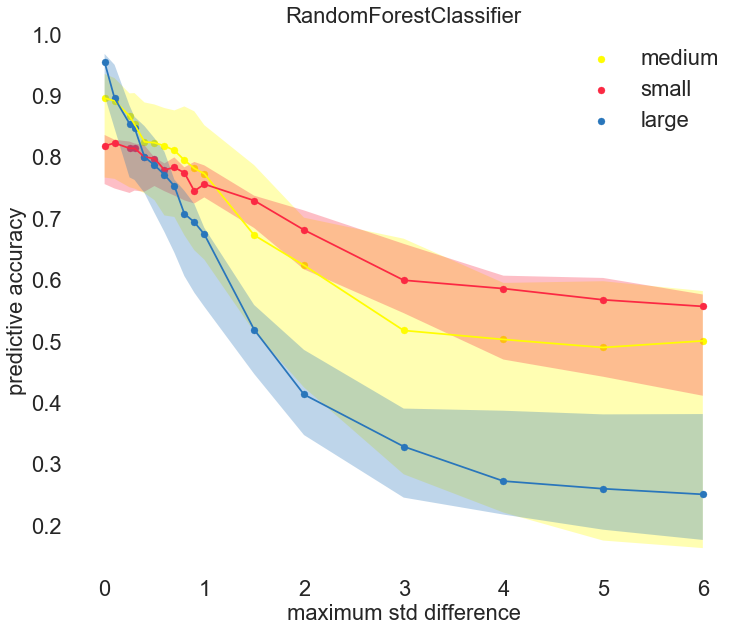

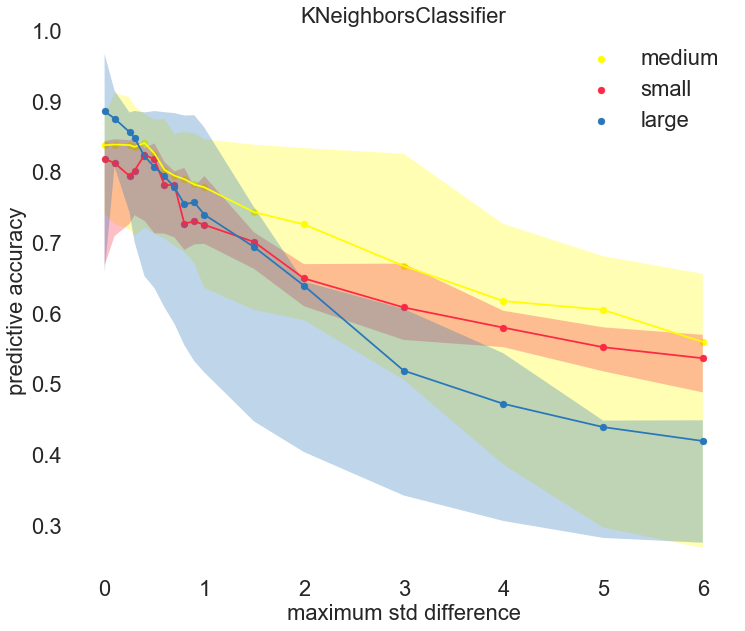

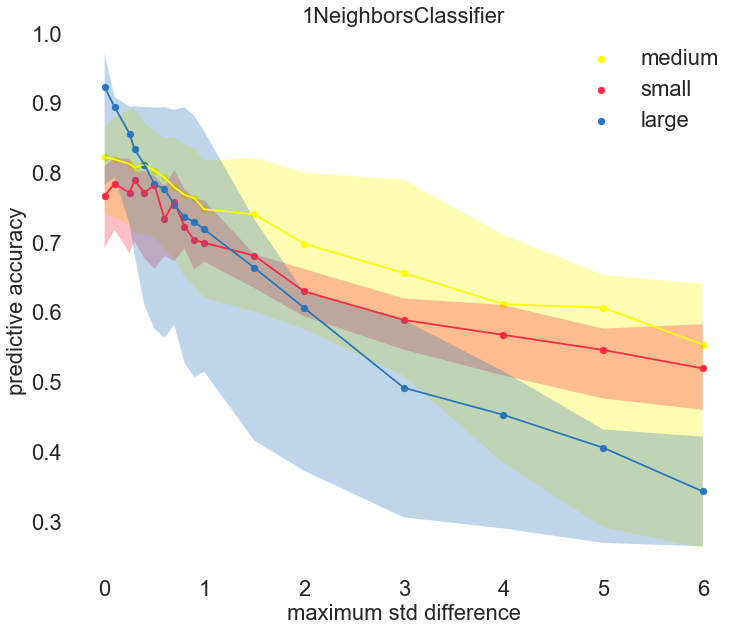

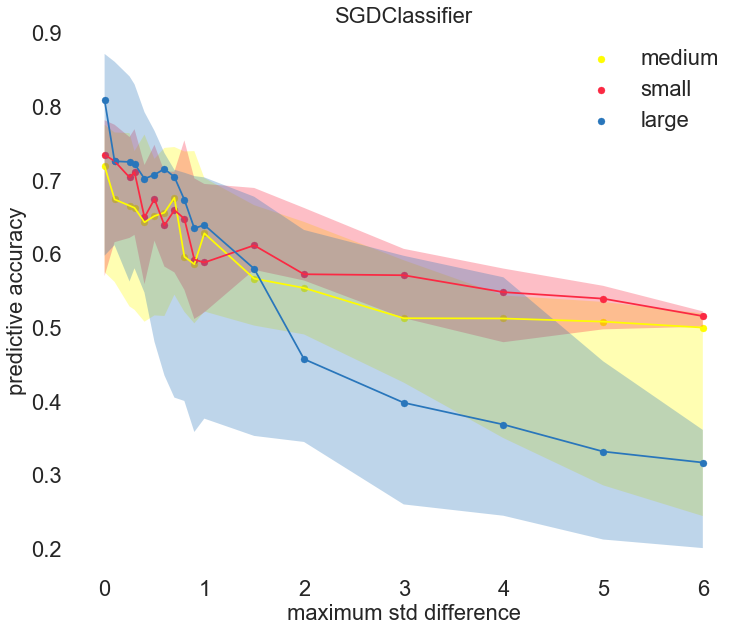

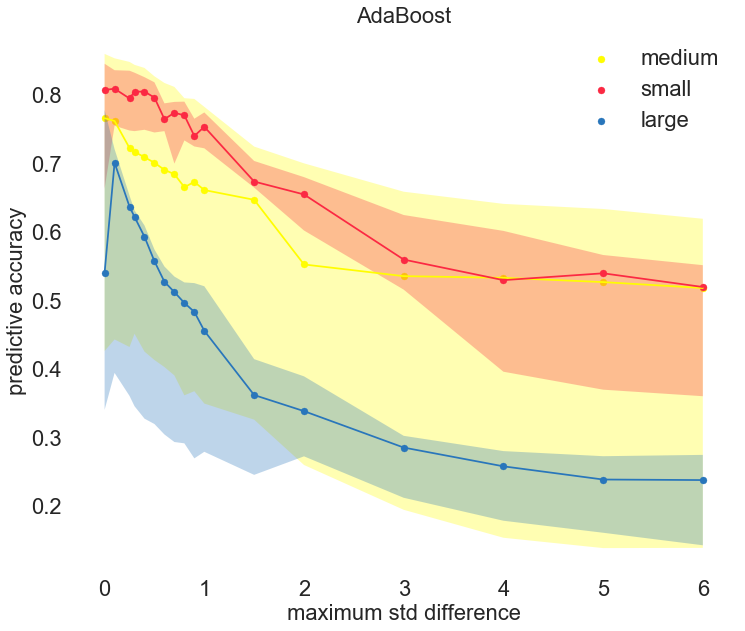

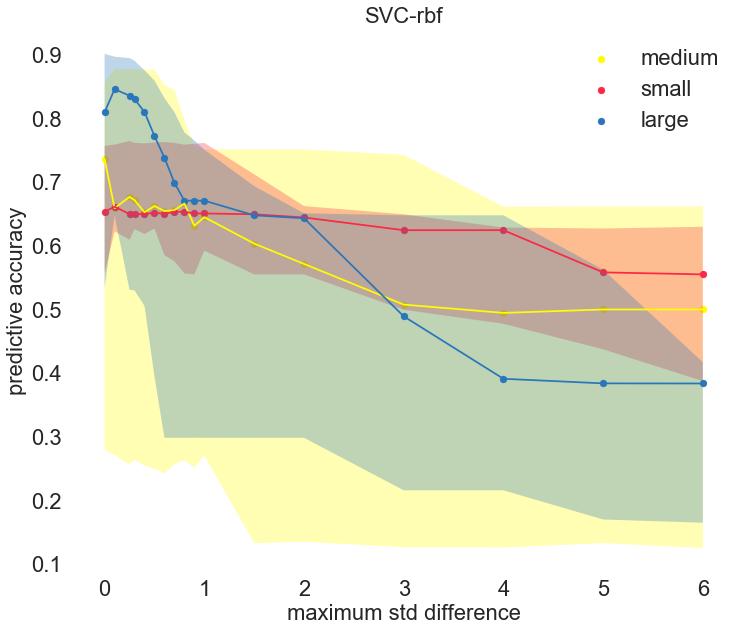

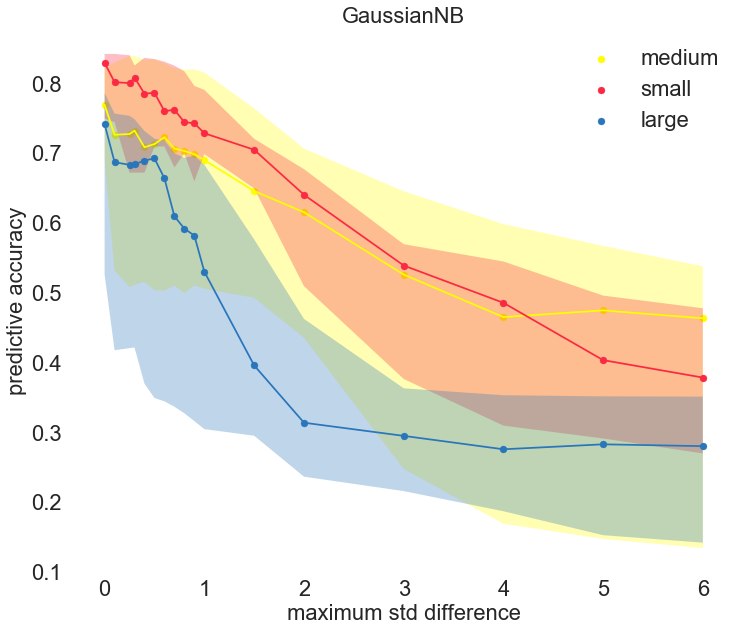

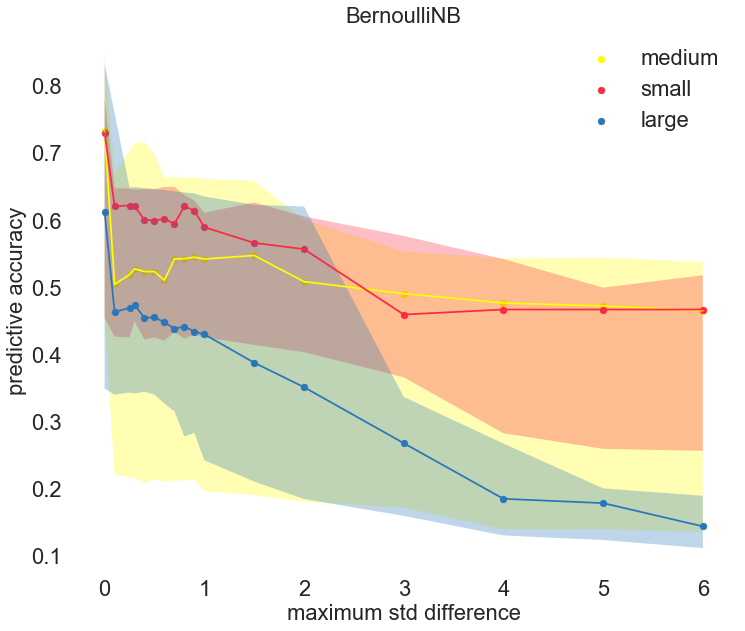

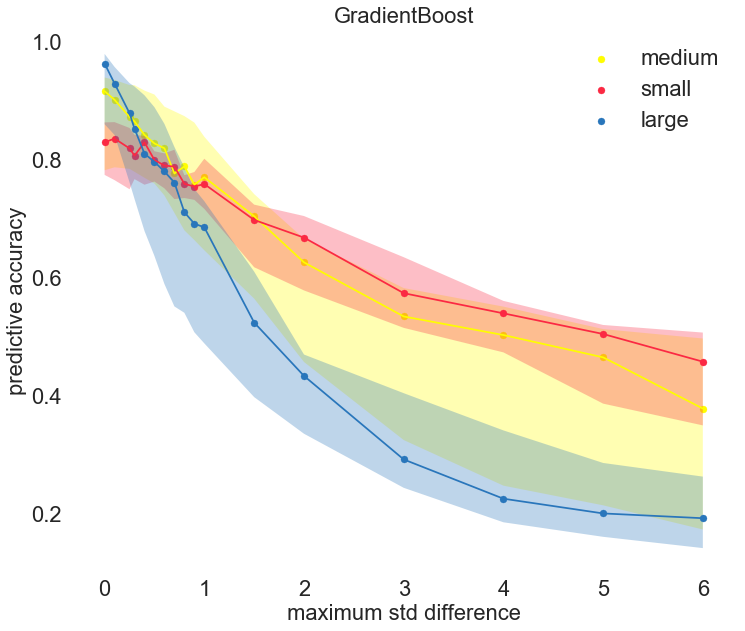

In [6]:
for k,clfName in enumerate(clfNames):
    
    cl = sns.hls_palette(len(score2), l=.3, s=.8)
    fig, ax = plt.subplots() 
    lines1 = CIIntervals(score1[k])
    lines2 = CIIntervals(score2[k])
    lines3 = CIIntervals(score3[k])
    clrs = sns.color_palette("husl", 5)
    cuk = 'xkcd:bright yellow'
    clo = 'xkcd:strawberry'
    col = 'xkcd:bluish'
    # with sns.axes_style("darkgrid"):
    #     for i in range(5):
    ax.fill_between(x_axis, lines2[0], lines2[2],alpha=0.3, facecolor=cuk)
    _=ax.plot(x_axis, lines2[1], c=cuk)
    _=ax.scatter(x_axis, lines2[1], c=cuk , label = 'medium')
    ax.fill_between(x_axis, lines1[0], lines1[2],alpha=0.3, facecolor=clo)
    _=ax.plot(x_axis, lines1[1], c=clo)
    _=ax.scatter(x_axis, lines1[1], c=clo , label = 'small')


    ax.fill_between(x_axis, lines3[0], lines3[2],alpha=0.3, facecolor=col)
    _=ax.plot(x_axis, lines3[1], c=col)
    _=ax.scatter(x_axis, lines3[1], c=col , label = 'large')

    #     _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
    _=plt.ylabel('predictive accuracy')
    _=plt.xlabel('maximum std difference')
    plt.title(clfName)
    fig.set_figheight(10)
    fig.set_figwidth(12)
    ax.legend( prop={'size': 22})
    #     plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)    
    plt.show()

In [3]:
#numberOfFeatures
less20 = []
great100 = []
rest2 = []
for i,item in enumerate(NonCat):
    if readDict(item)['NumberOfFeatures'] < 20:
        less20.append(item)
    elif readDict(item)['NumberOfFeatures'] > 100:
        great100.append(item)
    else:
        rest2.append(item)

In [89]:
# Feature noise in numerical datasets
from Noise2 import CIIntervals
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(less20):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
scores2 = []
for i,did in enumerate(rest2):
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores2[i].append(score1)
scores3 = []
for i,did in enumerate(great100):
    scores3.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores3[i].append(score1)

score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([[] for i in range(len(amountList)+1)])
    score2.append([[] for i in range(len(amountList)+1)])
    score3.append([[] for i in range(len(amountList)+1)])
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][0].append(scores[k][j][i][0])
            score1[j][i+1].append(scores[k][j][i][1])
for k,x in enumerate(scores2):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][0].append(scores2[k][j][i][0])
            score2[j][i+1].append(scores2[k][j][i][1])
for k,x in enumerate(scores3):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score3[j][0].append(scores3[k][j][i][0])
            score3[j][i+1].append(scores3[k][j][i][1])
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2


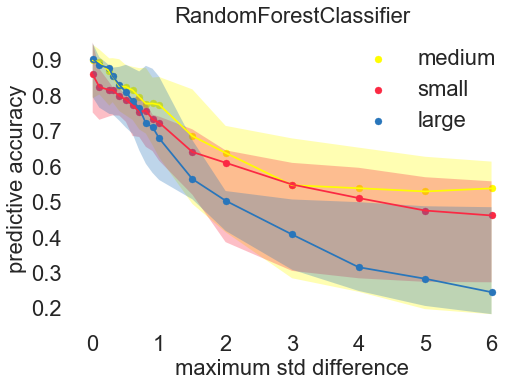

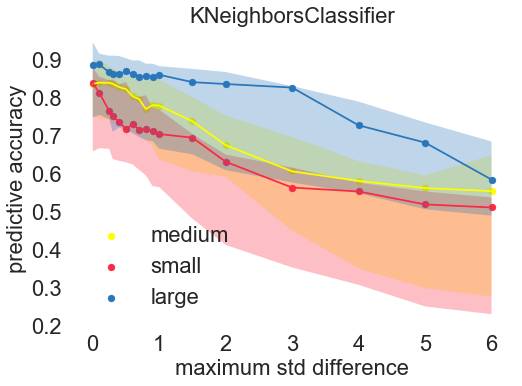

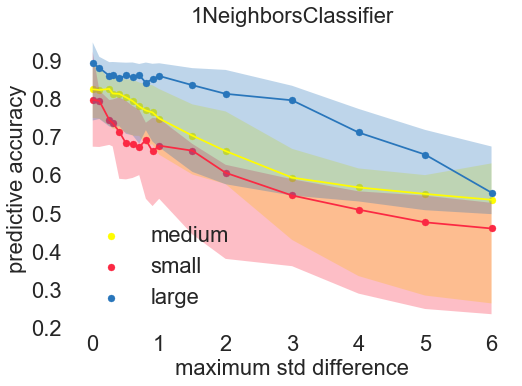

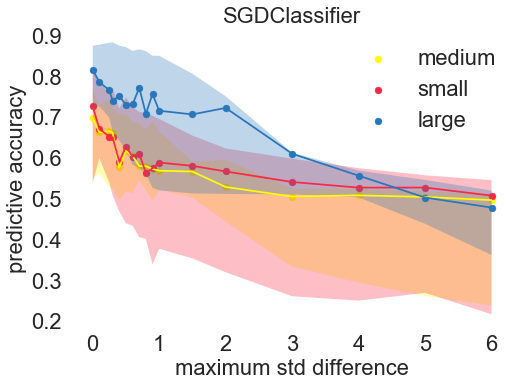

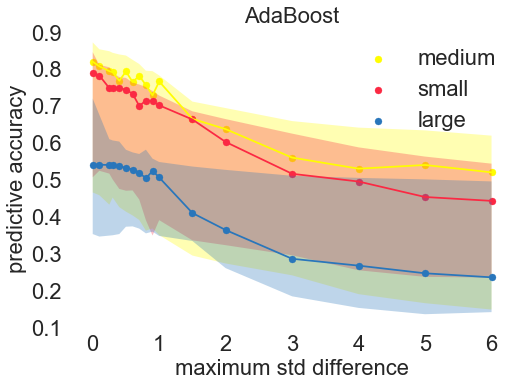

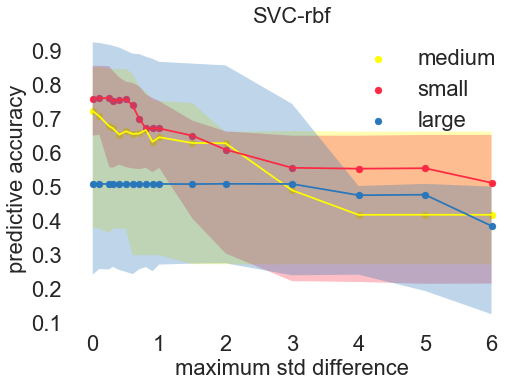

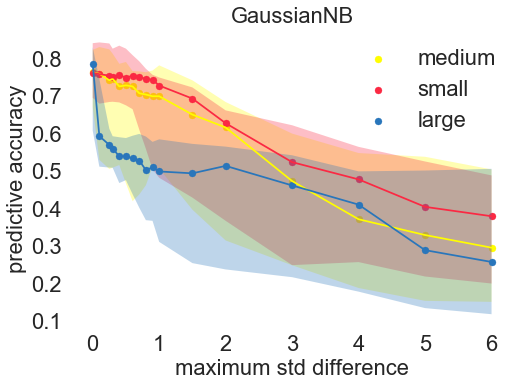

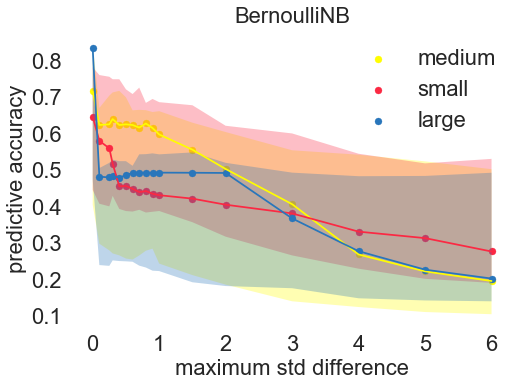

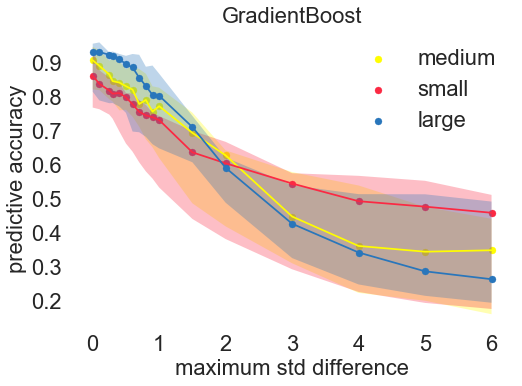

In [90]:
for k,clfName in enumerate(clfNames):
    
    cl = sns.hls_palette(len(score2), l=.3, s=.8)
    fig, ax = plt.subplots() 
    lines1 = CIIntervals(score1[k])
    lines2 = CIIntervals(score2[k])
    lines3 = CIIntervals(score3[k])
    clrs = sns.color_palette("husl", 5)
    cuk = 'xkcd:bright yellow'
    clo = 'xkcd:strawberry'
    col = 'xkcd:bluish'
    # with sns.axes_style("darkgrid"):
    #     for i in range(5):
    ax.fill_between(x_axis, lines2[0], lines2[2],alpha=0.3, facecolor=cuk)
    _=ax.plot(x_axis, lines2[1], c=cuk)
    _=ax.scatter(x_axis, lines2[1], c=cuk , label = 'medium')
    ax.fill_between(x_axis, lines1[0], lines1[2],alpha=0.3, facecolor=clo)
    _=ax.plot(x_axis, lines1[1], c=clo)
    _=ax.scatter(x_axis, lines1[1], c=clo , label = 'small')


    ax.fill_between(x_axis, lines3[0], lines3[2],alpha=0.3, facecolor=col)
    _=ax.plot(x_axis, lines3[1], c=col)
    _=ax.scatter(x_axis, lines3[1], c=col , label = 'large')

    #     _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
    _=plt.ylabel('predictive accuracy')
    _=plt.xlabel('maximum std difference')
    plt.title(clfName)
    ax.legend( prop={'size': 22})
    #     plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)    
    plt.show()

In [11]:
for i in didList:
    if readDict(i)['NumberOfSymbolicFeatures'] == 1:
        print(i)


In [3]:
read_features(func,clfName,did,amount)

[0.5903748733536001, 0.1796352583587, 0]

In [8]:
print(func,clfName,did,amount)

cvFeatureSTD1 GradientBoost 4538 6


In [6]:
listie = [1,2,3]
listig = [3,4,5]
listie.append(listig)

In [1]:
from LocalDatasets import read_featuresFull
func = 'cvFeatureSTD1'
clfName = 'GradientBoost'
did = 4538
amount = 6
read_featuresFull(func,clfName,did,amount)

[[0.603850050659,
  0.591691995947,
  0.590678824721,
  0.587639311044,
  0.585612968592,
  0.563323201621,
  0.628166160081,
  0.594731509625,
  0.559270516717,
  0.598784194529],
 [0.154002026342,
  0.187436676798,
  0.193515704154,
  0.155015197568,
  0.184397163121,
  0.183383991895,
  0.172239108409,
  0.180344478217,
  0.200607902736,
  0.185410334347],
 []]

In [4]:
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(less20):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_featuresFull(func,clfName,did,amount))
        scores[i].append(score1)

In [5]:
scores[0]

[[[[0.945945945946,
    0.940154440154,
    0.952380952381,
    0.944658944659,
    0.951093951094,
    0.951093951094,
    0.95045045045,
    0.954954954955,
    0.959459459459,
    0.947876447876,
    0.949806949807,
    0.956241956242,
    0.947876447876,
    0.955598455598,
    0.949163449163,
    0.947876447876,
    0.945302445302,
    0.947232947233,
    0.947876447876,
    0.946589446589],
   [0.802445302445,
    0.794723294723,
    0.810167310167,
    0.788288288288,
    0.797940797941,
    0.788931788932,
    0.799227799228,
    0.777348777349,
    0.800514800515,
    0.795366795367,
    0.798584298584,
    0.801801801802,
    0.801158301158,
    0.807593307593,
    0.801158301158,
    0.782496782497,
    0.796653796654,
    0.810167310167,
    0.796653796654,
    0.788288288288],
   []],
  [[0.952380952381,
    0.94851994852,
    0.945302445302,
    0.942728442728,
    0.951093951094,
    0.955598455598,
    0.949163449163,
    0.956885456885,
    0.94851994852,
    0.9530244

In [7]:
k = 0
j = 0
i = 0
scores[k][j][i][1]

[0.802445302445,
 0.794723294723,
 0.810167310167,
 0.788288288288,
 0.797940797941,
 0.788931788932,
 0.799227799228,
 0.777348777349,
 0.800514800515,
 0.795366795367,
 0.798584298584,
 0.801801801802,
 0.801158301158,
 0.807593307593,
 0.801158301158,
 0.782496782497,
 0.796653796654,
 0.810167310167,
 0.796653796654,
 0.788288288288]

In [9]:
# Feature noise in numerical datasets
from Noise2 import CIIntervals
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(less20):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_featuresFull(func,clfName,did,amount))
        scores[i].append(score1)
scores2 = []
for i,did in enumerate(rest2):
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_featuresFull(func,clfName,did,amount))
        scores2[i].append(score1)
scores3 = []
for i,did in enumerate(great100):
    scores3.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_featuresFull(func,clfName,did,amount))
        scores3[i].append(score1)

score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([[] for i in range(len(amountList)+1)])
    score2.append([[] for i in range(len(amountList)+1)])
    score3.append([[] for i in range(len(amountList)+1)])
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            for temp in scores[k][j][i][0]:
                score1[j][0].append(temp)
            for temp in scores[k][j][i][1]:
                score1[j][i+1].append(temp)
for k,x in enumerate(scores2):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            for temp in scores2[k][j][i][0]:
                score2[j][0].append(temp)
            for temp in scores2[k][j][i][1]:
                score2[j][i+1].append(temp)
for k,x in enumerate(scores3):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            for temp in scores3[k][j][i][0]:
                score3[j][0].append(temp)
            for temp in scores3[k][j][i][1]:
                score3[j][i+1].append(temp)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2

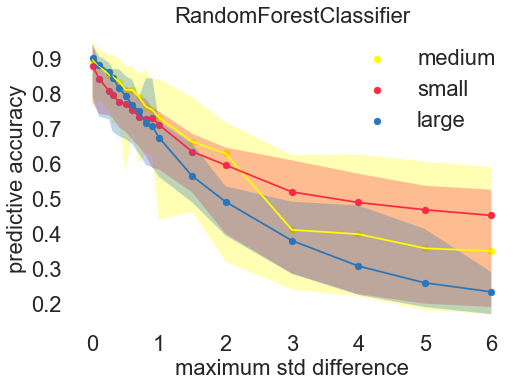

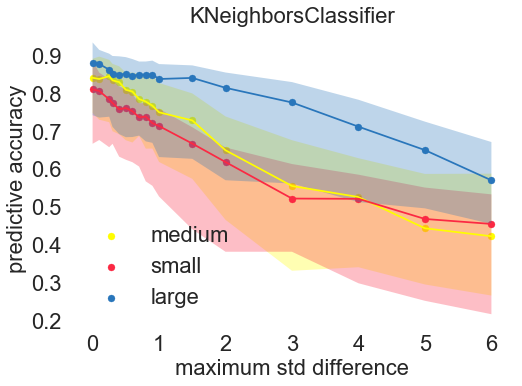

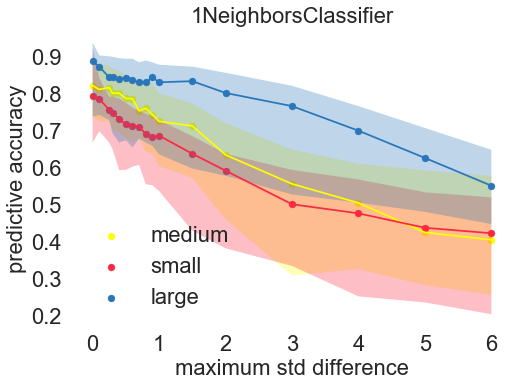

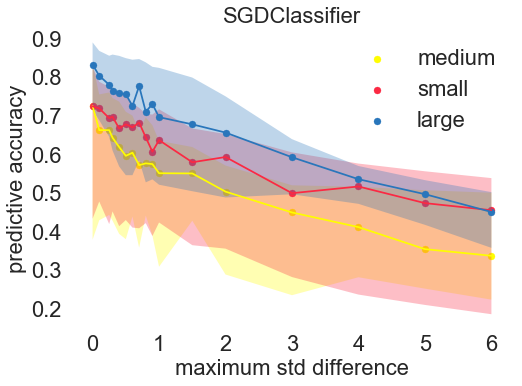

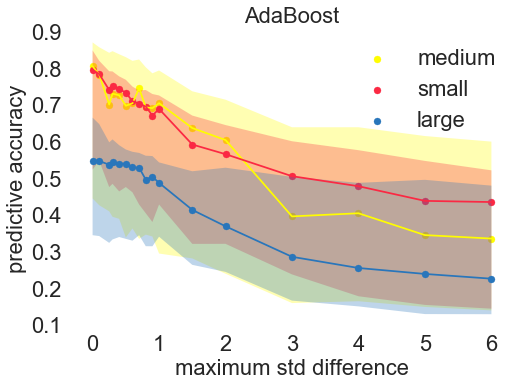

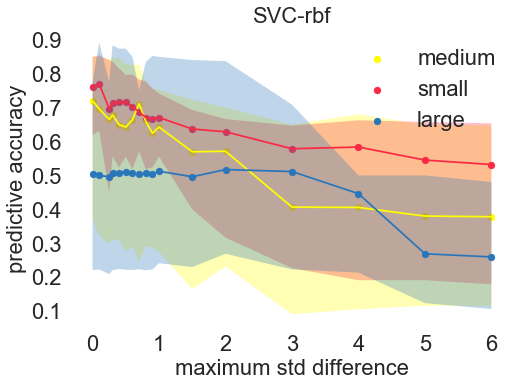

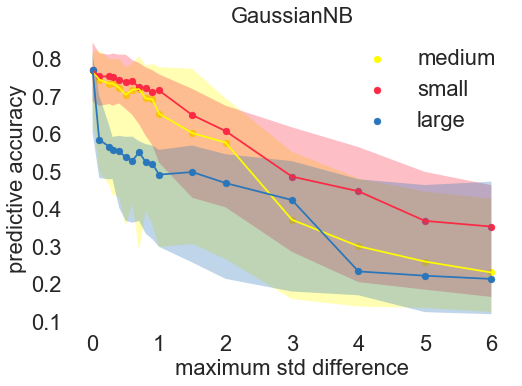

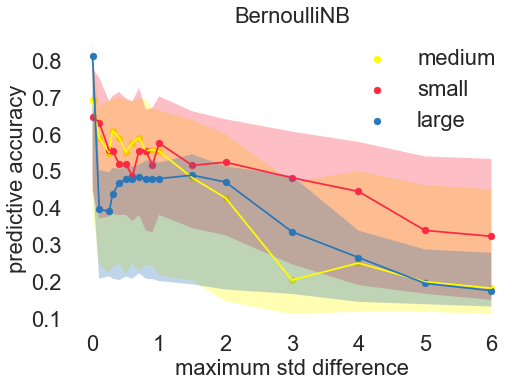

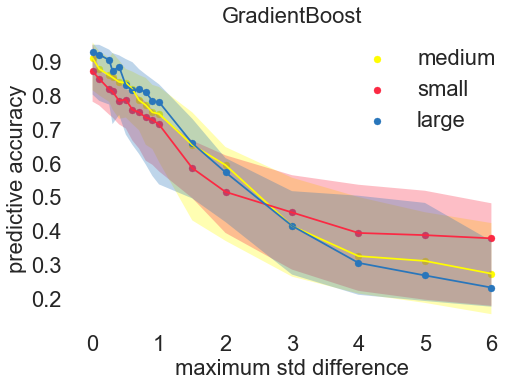

In [10]:
for k,clfName in enumerate(clfNames):
    
    cl = sns.hls_palette(len(score2), l=.3, s=.8)
    fig, ax = plt.subplots() 
    lines1 = CIIntervals(score1[k])
    lines2 = CIIntervals(score2[k])
    lines3 = CIIntervals(score3[k])
    clrs = sns.color_palette("husl", 5)
    cuk = 'xkcd:bright yellow'
    clo = 'xkcd:strawberry'
    col = 'xkcd:bluish'
    # with sns.axes_style("darkgrid"):
    #     for i in range(5):
    ax.fill_between(x_axis, lines2[0], lines2[2],alpha=0.3, facecolor=cuk)
    _=ax.plot(x_axis, lines2[1], c=cuk)
    _=ax.scatter(x_axis, lines2[1], c=cuk , label = 'medium')
    ax.fill_between(x_axis, lines1[0], lines1[2],alpha=0.3, facecolor=clo)
    _=ax.plot(x_axis, lines1[1], c=clo)
    _=ax.scatter(x_axis, lines1[1], c=clo , label = 'small')


    ax.fill_between(x_axis, lines3[0], lines3[2],alpha=0.3, facecolor=col)
    _=ax.plot(x_axis, lines3[1], c=col)
    _=ax.scatter(x_axis, lines3[1], c=col , label = 'large')

    #     _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
    _=plt.ylabel('predictive accuracy')
    _=plt.xlabel('maximum std difference')
    plt.title(clfName)
    ax.legend( prop={'size': 22})
    #     plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)    
    plt.show()

In [67]:
func = 'ResNoiseNum'
scores = []
amountList = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
# less20.remove(1120)
for i,did in enumerate(less20):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_featuresFull(func,clfName,did,amount))
        scores[i].append(score1)
scores2 = []
for i,did in enumerate(rest2):
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_featuresFull(func,clfName,did,amount))
        scores2[i].append(score1)
scores3 = []
for i,did in enumerate(great100):
    scores3.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_featuresFull(func,clfName,did,amount))
        scores3[i].append(score1)

score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([[] for i in range(len(amountList))])
    score2.append([[] for i in range(len(amountList))])
    score3.append([[] for i in range(len(amountList))])
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
#             for temp in scores[k][j][i][0]:
#                 score1[j][0].append(temp)
            for temp in scores[k][j][i][0]:
                score1[j][i].append(temp)
for k,x in enumerate(scores2):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
#             for temp in scores2[k][j][i][0]:
#                 score2[j][0].append(temp)
            for temp in scores2[k][j][i][0]:
                score2[j][i].append(temp)
for k,x in enumerate(scores3):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
#             for temp in scores3[k][j][i][0]:
#                 score3[j][0].append(temp)
            for temp in scores3[k][j][i][0]:
                score3[j][i].append(temp)
amountList2 = []
for i in amountList:
    amountList2.append(i)
x_axis = amountList2

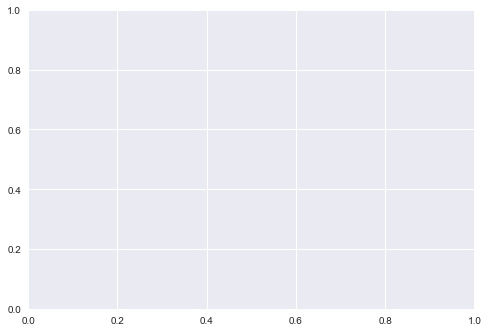

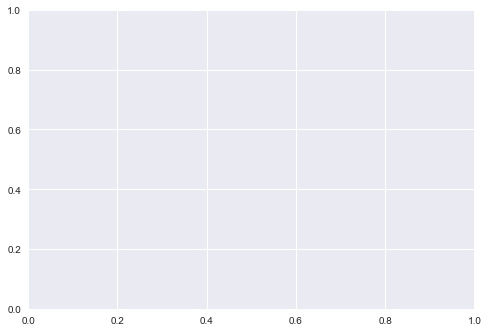

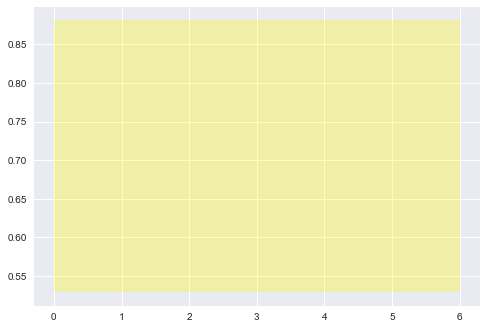

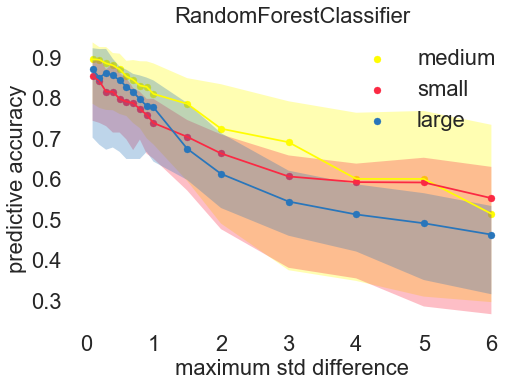

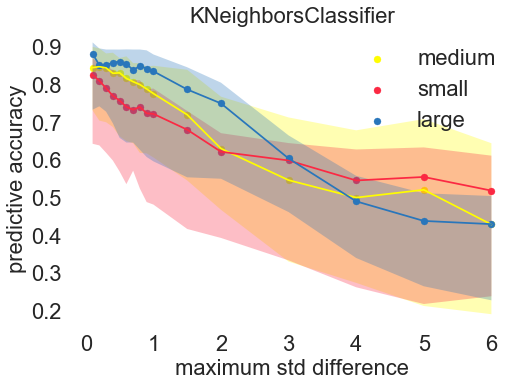

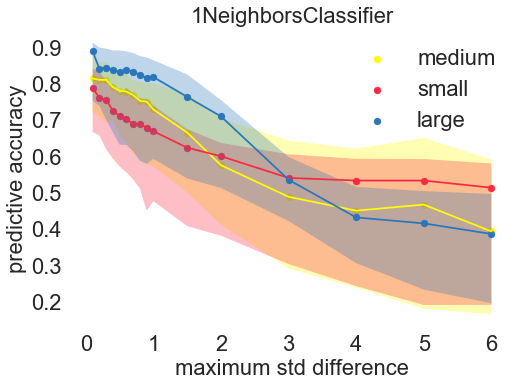

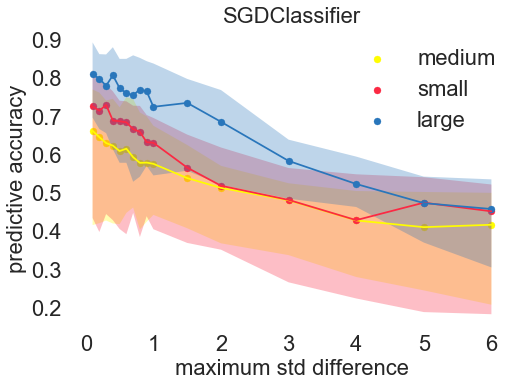

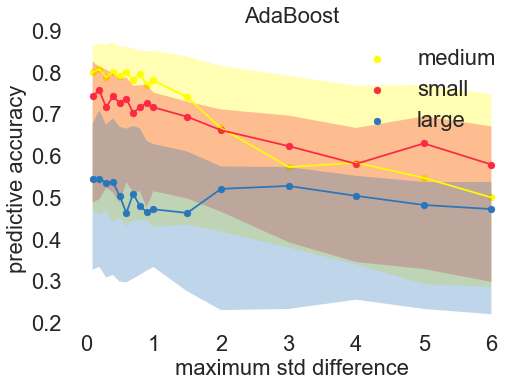

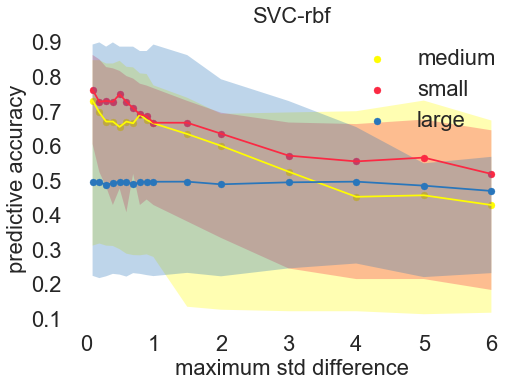

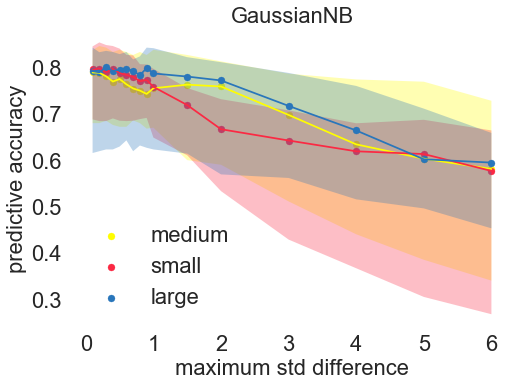

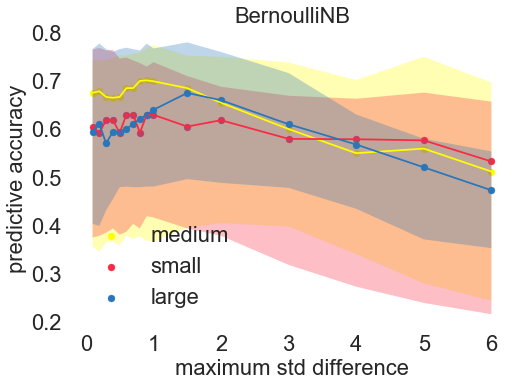

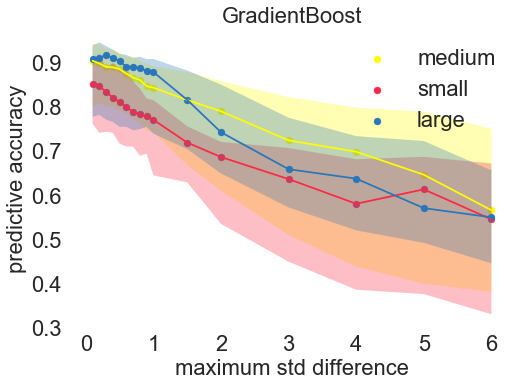

In [68]:
for k,clfName in enumerate(clfNames):
    
    cl = sns.hls_palette(len(score2), l=.3, s=.8)
    fig, ax = plt.subplots() 
    lines1 = CIIntervals(score1[k])
    lines2 = CIIntervals(score2[k])
    lines3 = CIIntervals(score3[k])
    clrs = sns.color_palette("husl", 5)
    cuk = 'xkcd:bright yellow'
    clo = 'xkcd:strawberry'
    col = 'xkcd:bluish'
    # with sns.axes_style("darkgrid"):
    #     for i in range(5):
    ax.fill_between(x_axis, lines2[0], lines2[2],alpha=0.3, facecolor=cuk)
    _=ax.plot(x_axis, lines2[1], c=cuk)
    _=ax.scatter(x_axis, lines2[1], c=cuk , label = 'medium')
    ax.fill_between(x_axis, lines1[0], lines1[2],alpha=0.3, facecolor=clo)
    _=ax.plot(x_axis, lines1[1], c=clo)
    _=ax.scatter(x_axis, lines1[1], c=clo , label = 'small')


    ax.fill_between(x_axis, lines3[0], lines3[2],alpha=0.3, facecolor=col)
    _=ax.plot(x_axis, lines3[1], c=col)
    _=ax.scatter(x_axis, lines3[1], c=col , label = 'large')

    #     _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
    _=plt.ylabel('predictive accuracy')
    _=plt.xlabel('maximum std difference')
    plt.title(clfName)
    ax.legend( prop={'size': 22})
    #     plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)    
    plt.show()

In [23]:
len(score1[1])
# for i,item in score1

16

In [21]:
score1[1].remove([])

In [43]:
for j,item in enumerate(score1):
    for i,itemz in enumerate(score1[j]):
        if score1[j][i] == []:
            score1[j].remove([])


In [53]:
lines1 = CIIntervals(score1[k])

In [61]:
for i,item in enumerate(score1):
    while [] in score1[0]:
        score1[i].remove([])
for i,item in enumerate(score2):
    while [] in score2[0]:
        score2[i].remove([])
for i,item in enumerate(score3):
    while [] in score3[0]:
        score3[i].remove([])

In [62]:
len(score2[0])

1

In [64]:
scores2[k][j][i][1]

[]

In [66]:
scores2[0][0][0]

[[0.824561403509,
  0.811403508772,
  0.815789473684,
  0.822368421053,
  0.822368421053,
  0.826754385965,
  0.833333333333,
  0.822368421053,
  0.833333333333,
  0.828947368421],
 [],
 []]